# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt

# Functions

Function mse_analysis(df)

Can be used to group data frame by columns and calculate the mse between our label column and y_pred column.

In [2]:
def mse_analysis(df):
    MSE = mean_squared_error(df['TREFMXAV_U'], df['y_pred'])
    return pd.Series(dict(MSE = MSE))

Function analysis_member(df)

Takes df_test and calculates MSE score per ensemble member.

In [3]:
def analysis_member(df):
    by_ensemble = df.groupby(['Ensemble_num']).apply(mse_analysis).reset_index()
    by_ensemble = by_ensemble.rename(columns={"Ensemble_num":"Ensemble number"})
    by_ensemble = by_ensemble.set_index('Ensemble number')
    
    return by_ensemble

Function analysis_location(df)

Groups y_pred by location and calculates MSE. Then sets MultiIndex with ['lat','lon']

In [4]:
def analysis_location(df):
    by_location = df.groupby(['lat','lon']).apply(mse_analysis).reset_index()
    by_location = by_location.set_index(['lat','lon'])
    
    return by_location

Function plot_spatial_mse1(df)

After grouping by location and calculating MSE, we can plot the MSE score of each laitude/longitude combination on a map.

Scale bar range set to between 0.5 and 1.3 (to compare CatBoost and XGBoost models)

In [5]:
def plot_spatial_mse1(df):
    ##Make map of the UK to plot onto
    projection = ccrs.Mercator()
    ##Specify CRS, that will be used to tell the code, where our data should be plotted
    crs = ccrs.PlateCarree()
    
    # Now we will create axes object having specific projection 
    plt.figure(dpi=200) #adjust size
    ax = plt.axes(projection=projection, frameon=True)

    # Draw gridlines in degrees over Mercator map
    # Define our custom latitude and longitude grid line locations
    custom_latitudes = [49.48, 50.42, 51.36, 52.30, 53.25, 54.19, 55.13, 56.07, 57.02, 57.96, 58.90]
    custom_longitudes = [-7.50, -6.25, -5.00, -3.75, -2.50, -1.25, 0.00, 1.25]

    ##Set custom grid lines
    gl = ax.gridlines(xlocs=custom_longitudes, ylocs=custom_latitudes,
                linewidth=.6, color='gray', alpha=0.5, linestyle='-.',
                draw_labels=True
                )
    ##Remove repeated labels from bottom and left axis
    gl.bottom_labels = False
    gl.right_labels = False
    ##Set size of lon/lat labels
    gl.xlabel_style = {"size" : 7}
    gl.ylabel_style = {"size" : 7}

    ##Add borders and coastlines to map
    ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
    ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)

    # Now, we will specify extent of our map in minimum/maximum longitude/latitude
    # Note that these values are specified in degrees of longitude and degrees of latitude
    ##I set it as the max/min longitude +/- 0.94 and max/min latitude +/- 1.25 (the resolutions which we use)
    lon_min = -8.75
    lon_max = 2.5
    lat_min = 48.54
    lat_max = 59.84

    ##crs is PlateCarree -> we are explicitly telling axes, that we are creating bounds that are in degrees
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)
    #plt.title("Spatial model performance across the UK according to MSE metric")

    ##Get reversed colour scale going from green (low) to red (high)
    cmap_reversed = plt.cm.get_cmap('RdYlGn_r')

    ##Overlay matplotlib scatter plot of MSE values
    plt.scatter(df['lon'], df['lat'], transform=ccrs.PlateCarree(), \
            label=None, c=df['MSE'],
            vmin=0.5, vmax=1.3, ##Set the same range for the colorbar so that it is comparable amongst all models
            #cmap='seismic', alpha=0.5,
            #cmap='Oranges', alpha=1,
            cmap=cmap_reversed, alpha=1,
            linewidth=8,
           #marker="s" #to make markers square (instead of circles)
           )
    ##Add and label colour bar
    plt.colorbar(label='Test MSE score')
    ##Add x- and y-axis labels
    ax.text(0.5, 1.08, 'Longitude', va='bottom', ha='center', rotation='horizontal', transform=ax.transAxes, fontsize=12)
    ax.text(-0.27, 0.5, 'Latitude', va='center', ha='right', rotation='vertical', transform=ax.transAxes, fontsize=12)

Function plot_spatial_mse2(df)

After grouping by location and calculating MSE, we can plot the MSE score of each laitude/longitude combination on a map.

Scale bar range set to between 0.6 and 1.8 (to compare LightGBM models together)

In [6]:
def plot_spatial_mse2(df):
    ##Make map of the UK to plot onto
    projection = ccrs.Mercator()
    ##Specify CRS, that will be used to tell the code, where our data should be plotted
    crs = ccrs.PlateCarree()
    
    # Now we will create axes object having specific projection 
    plt.figure(dpi=200) #adjust size
    ax = plt.axes(projection=projection, frameon=True)

    # Draw gridlines in degrees over Mercator map
    # Define our custom latitude and longitude grid line locations
    custom_latitudes = [49.48, 50.42, 51.36, 52.30, 53.25, 54.19, 55.13, 56.07, 57.02, 57.96, 58.90]
    custom_longitudes = [-7.50, -6.25, -5.00, -3.75, -2.50, -1.25, 0.00, 1.25]

    ##Set custom grid lines
    gl = ax.gridlines(xlocs=custom_longitudes, ylocs=custom_latitudes,
                linewidth=.6, color='gray', alpha=0.5, linestyle='-.',
                draw_labels=True
                )
    ##Remove repeated labels from bottom and left axis
    gl.bottom_labels = False
    gl.right_labels = False
    ##Set size of lon/lat labels
    gl.xlabel_style = {"size" : 7}
    gl.ylabel_style = {"size" : 7}

    ##Add borders and coastlines to map
    ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
    ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)

    # Now, we will specify extent of our map in minimum/maximum longitude/latitude
    # Note that these values are specified in degrees of longitude and degrees of latitude
    ##I set it as the max/min longitude +/- 0.94 and max/min latitude +/- 1.25 (the resolutions which we use)
    lon_min = -8.75
    lon_max = 2.5
    lat_min = 48.54
    lat_max = 59.84

    ##crs is PlateCarree -> we are explicitly telling axes, that we are creating bounds that are in degrees
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)
    #plt.title("Spatial model performance across the UK according to MSE metric")

    ##Get reversed colour scale going from green (low) to red (high)
    cmap_reversed = plt.cm.get_cmap('RdYlGn_r')

    ##Overlay matplotlib scatter plot of MSE values
    plt.scatter(df['lon'], df['lat'], transform=ccrs.PlateCarree(), \
            label=None, c=df['MSE'],
            vmin=0.6, vmax=1.8, ##Set the same range for the colorbar so that it is comparable amongst all models
            #cmap='seismic', alpha=0.5,
            #cmap='Oranges', alpha=1,
            cmap=cmap_reversed, alpha=1,
            linewidth=8,
           #marker="s" #to make markers square (instead of circles)
           )
    ##Add and label colour bar
    plt.colorbar(label='Test MSE score')
    ##Add x- and y-axis labels
    ax.text(0.5, 1.08, 'Longitude', va='bottom', ha='center', rotation='horizontal', transform=ax.transAxes, fontsize=12)
    ax.text(-0.27, 0.5, 'Latitude', va='center', ha='right', rotation='vertical', transform=ax.transAxes, fontsize=12)

Function analysis_year(df)

Extracts year from 'time' index and groups by year to calculate MSE error per year

In [7]:
def analysis_year(df):
    by_year = df.groupby(pd.DatetimeIndex(df['time']).year).apply(mse_analysis).reset_index()
    by_year = by_year.rename(columns={"time":"Year"})
    by_year = by_year.set_index('Year')

    return by_year

Function analysis_seasonal(df)

Takes df_test and groups dates by season and calculates MSE

In [8]:
def analysis_seasonal(df):
    ##MSE by season
    ##Extract season from 'time' column
    by_season = df.groupby(pd.DatetimeIndex(df['time']).month%12 // 3 + 1).apply(mse_analysis).reset_index()
    ##Re-name integer seasonal indicators to abbreviation of months
    mapping = {1:'DJF',2:'MAM',3:'JJA',4:'SON'}
    by_season['time'] = by_season['time'].map(mapping)
    ##Re-name 'time' column
    by_season = by_season.rename(columns={"time":"Season"})
    ##Set index
    by_season = by_season.set_index('Season')

    return by_season

# By ensemble member

## CatBoost

## Loading in y_pred(s)

### Baseline CatBoost

In [9]:
baseline_catboost = pd.read_csv('y_pred_reg_catboost.csv', index_col=0)
##Convert 'time' to datetime
baseline_catboost['time'] = pd.to_datetime(baseline_catboost['time'])
#display(baseline_catboost)

### 1-LAGGED-AUTOREG_catboost (#1 emulator)

In [10]:
lagged_autoreg_catboost = pd.read_csv('y_pred_1-lagged-autoreg_catboost.csv', index_col=0)
##Convert 'time' to datetime
lagged_autoreg_catboost['time'] = pd.to_datetime(lagged_autoreg_catboost['time'])
#display(lagged_autoreg_catboost)

### EXTRAS - 1-AUTOREG_catboost (#2 emulator)

autoreg_catboost = pd.read_csv('y_pred_1-autoreg_catboost.csv', index_col=0)
##Convert 'time' to datetime
autoreg_catboost['time'] = pd.to_datetime(autoreg_catboost['time'])
#display(autoreg_catboost)

In [11]:
##Group Baseline CatBoost predictions by ensemble member and calculate MSE
baseline_catboost_ensemble = analysis_member(baseline_catboost)
##Group 1-LAGGED-AUTOREG CatBoost predictions by ensemble member and calculate MSE
lagged_autoreg_catboost_ensemble = analysis_member(lagged_autoreg_catboost)
##Group 1-AUTOREG CatBoost predictions by ensemble member and calculate MSE
#autoreg_catboost_ensemble = analysis_member(autoreg_catboost)

#print('Baseline CatBoost MSE per ensemble member, sorted in decreasing order:')
#display(baseline_catboost_ensemble.sort_values(by='MSE', ascending=False))
print('1-LAGGED-AUTOREG CatBoost MSE per ensemble member, sorted in decreasing order:')
display(lagged_autoreg_catboost_ensemble.sort_values(by='MSE', ascending=False))
#print('1-AUTOREG CatBoost MSE per ensemble member, sorted in decreasing order:')
#display(autoreg_catboost_ensemble.sort_values(by='MSE', ascending=False))

1-LAGGED-AUTOREG CatBoost MSE per ensemble member, sorted in decreasing order:


MSE
Ensemble number          
16               0.784834
28               0.747805
32               0.746505
14               0.745865
6                0.744034
17               0.735044
7                0.725296
29               0.720055
9                0.719663
8                0.718699
19               0.715057
22               0.711578
23               0.711399
31               0.709601
24               0.705799
21               0.705733
11               0.699624
15               0.699488
10               0.698679
26               0.696828
3                0.695760
25               0.689424
4                0.687179
12               0.679623
20               0.677370
30               0.670677
13               0.668010
27               0.665374
33               0.663070
18               0.660457
5                0.638593

## Calculating largest improvements (difference) between Baseline and autogressive/laged covariate model predictions

In [12]:
##Concatenate together the tables reporting MSE per ensemble member
baseline_vs_lagged_autoreg = pd.concat([baseline_catboost_ensemble,lagged_autoreg_catboost_ensemble],axis=1)
## Renaming columns
baseline_vs_lagged_autoreg.columns.values[0] = "Baseline"
baseline_vs_lagged_autoreg.columns.values[1] = "1-LAGGED-AUTOREG"
##Calculate the difference between the two columns
baseline_vs_lagged_autoreg['Difference'] = baseline_vs_lagged_autoreg['Baseline'] - baseline_vs_lagged_autoreg['1-LAGGED-AUTOREG']

##Viewing in terms of which ensemble member prediction improved the most
display(baseline_vs_lagged_autoreg.sort_values(by='Difference',ascending=False))
##Save to table for report
baseline_vs_lagged_autoreg.to_csv('CatBoost emulator MSE comparison.csv')

Baseline  1-LAGGED-AUTOREG  Difference
Ensemble number                                        
32               0.784122          0.746505    0.037618
9                0.756569          0.719663    0.036906
29               0.754337          0.720055    0.034281
19               0.749147          0.715057    0.034090
10               0.730859          0.698679    0.032181
20               0.708849          0.677370    0.031479
24               0.736282          0.705799    0.030484
21               0.736159          0.705733    0.030426
6                0.774000          0.744034    0.029965
15               0.729381          0.699488    0.029893
4                0.715553          0.687179    0.028374
16               0.812940          0.784834    0.028106
23               0.737702          0.711399    0.026303
17               0.761017          0.735044    0.025974
7                0.750381          0.725296    0.025086
11               0.724116          0.699624    0.024492
31               0.733329          0.709601    0.023728
22               0.735251          0.711578    0.023673
25               0.711034          0.689424    0.021610
5                0.659374          0.638593    0.020781
18               0.680918          0.660457    0.020461
3                0.716143          0.695760    0.020383
12               0.698922          0.679623    0.019299
33               0.682243          0.663070    0.019173
27               0.684169          0.665374    0.018796
30               0.688789          0.670677    0.018113
14               0.763327          0.745865    0.017461
13               0.685100          0.668010    0.017089
28               0.763306          0.747805    0.015501
26               0.711234          0.696828    0.014406
8                0.732085          0.718699    0.013385

Trying to visualise as subplot...

#### Visualise "most improved" member 32

In [13]:
##Baseline CatBoost vs 1-LAGGED-AUTOREG CatBoost

##Grabbing London dates of Baseline CatBoost 
baseline_catboost_london = baseline_catboost.loc[(baseline_catboost['lat']>51)&(baseline_catboost['lat']<52)&(baseline_catboost['lon']==0)]
##Grabbing London dates of 1-LAGGED-AUTOREG CatBoost 
lagged_autoreg_catboost_london = lagged_autoreg_catboost.loc[(lagged_autoreg_catboost['lat']>51)&(baseline_catboost['lat']<52)&(lagged_autoreg_catboost['lon']==0)]
##Grabbing 'most improved' ensemble member 32 from both
baseline_catboost_london_32 = baseline_catboost_london.loc[baseline_catboost_london['Ensemble_num']==32]
lagged_autoreg_catboost_london_32 = lagged_autoreg_catboost_london.loc[lagged_autoreg_catboost_london['Ensemble_num']==32]
##Set time index
baseline_catboost_london_32 = baseline_catboost_london_32.set_index('time')
lagged_autoreg_catboost_london_32 = lagged_autoreg_catboost_london_32.set_index('time')
##Remove unecessary columns
baseline_catboost_london_32 = baseline_catboost_london_32.drop(columns=['lat','lon','Ensemble_num']) ##Keeping 'TREFMXAV_U' (y true) column once
lagged_autoreg_catboost_london_32 = lagged_autoreg_catboost_london_32.drop(columns=['lat','lon','Ensemble_num','TREFMXAV_U']) ##Keeping y_pred column once
##Re-naming columns
baseline_catboost_london_32 = baseline_catboost_london_32.rename(columns={'TREFMXAV_U': 'y test', 'y_pred': 'Baseline CatBoost'})
lagged_autoreg_catboost_london_32 = lagged_autoreg_catboost_london_32.rename(columns={'y_pred': '1-LAGGED-AUTOREG CatBoost'})

##Concatenate together column-wise
baseline_vs_lagged_autoreg_ts = pd.concat([baseline_catboost_london_32,lagged_autoreg_catboost_london_32],axis=1).dropna()   ##Must remove rows with NaN (because 1-lag day removes 1 day)

display(baseline_vs_lagged_autoreg_ts)

y test  Baseline CatBoost  1-LAGGED-AUTOREG CatBoost
time                                                               
2071-01-02  288.59940         289.012498                 288.067361
2071-01-03  284.86813         285.309150                 285.363729
2071-01-04  285.39297         285.882983                 285.657381
2071-01-05  286.99170         286.840430                 286.534147
2071-01-06  284.55910         284.707115                 284.776517
...               ...                ...                        ...
2080-12-27  285.78497         286.331013                 286.074507
2080-12-28  285.51950         286.038611                 285.485555
2080-12-29  287.41840         288.124256                 288.392528
2080-12-30  287.50967         288.164819                 287.556199
2080-12-31  286.01340         286.778258                 286.682973

[3649 rows x 3 columns]

Plotting y test, Baseline and improved emulator all together

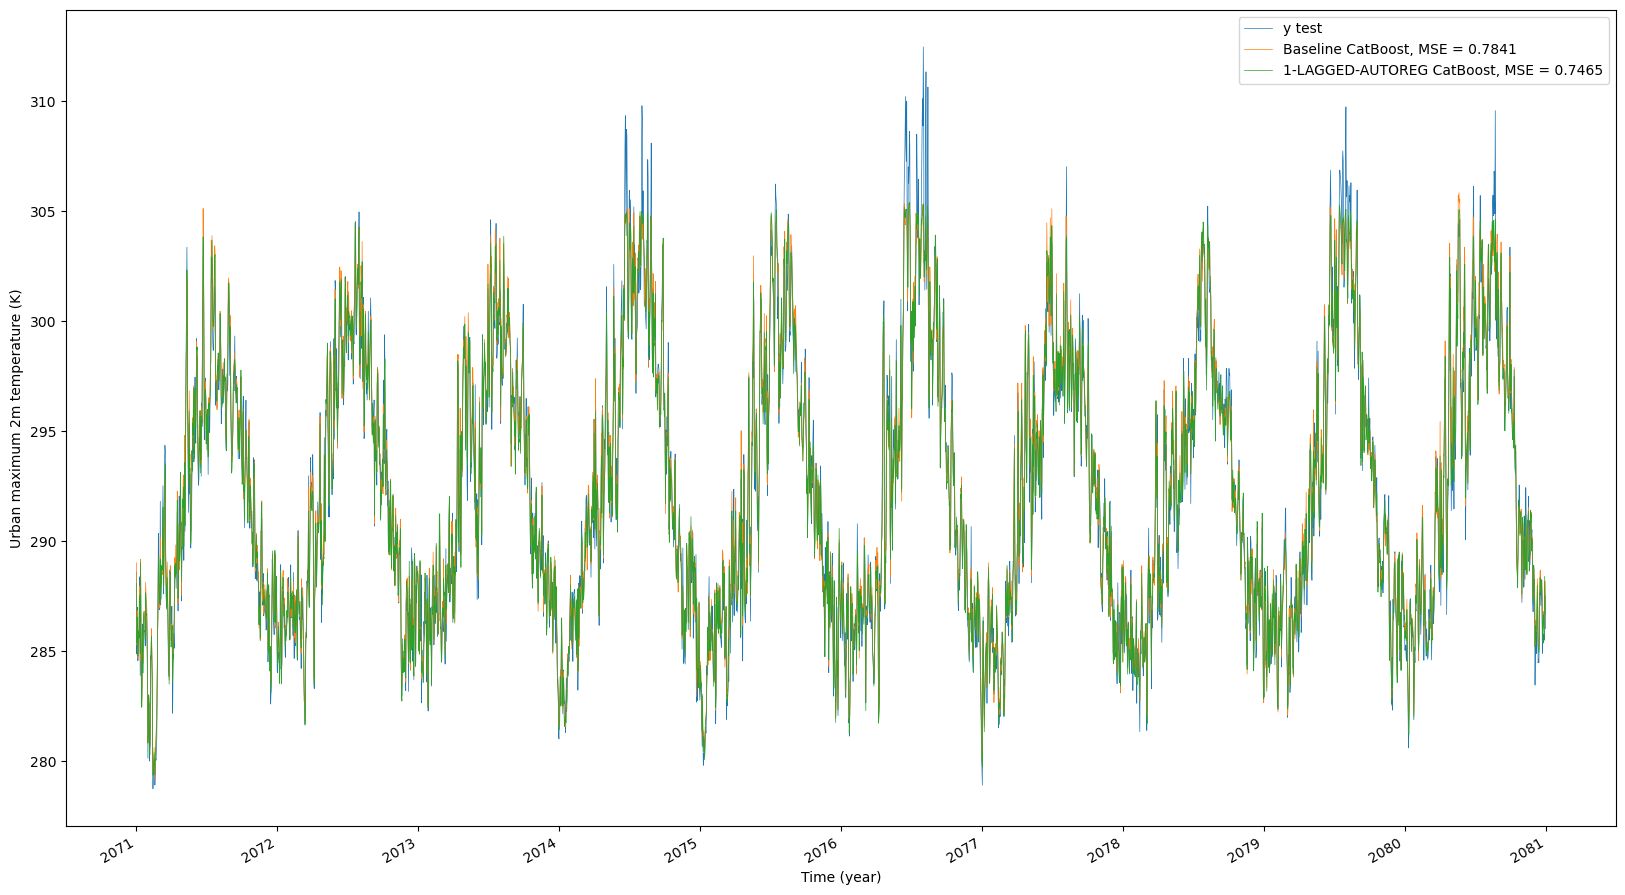

In [14]:
ax = baseline_vs_lagged_autoreg_ts.plot(figsize=(20,12),lw=0.5)
ax.legend(['y test', 'Baseline CatBoost, MSE = 0.7841', '1-LAGGED-AUTOREG CatBoost, MSE = 0.7465'])
ax.set_xlabel("Time (year)")
ax.set_ylabel("Urban maximum 2m temperature (K)")
plt.savefig('y true vs baseline vs 1-lagged-autoreg catboost daily (ensemble 32).png', bbox_inches = 'tight')

Re-plot but using weekly averages

In [15]:
##Calculating weekly mean
baseline_vs_lagged_autoreg_ts_weekly_mean = baseline_vs_lagged_autoreg_ts.groupby(pd.Grouper(freq="W"))[['y test','Baseline CatBoost','1-LAGGED-AUTOREG CatBoost']].mean()
display(baseline_vs_lagged_autoreg_ts_weekly_mean)

y test  Baseline CatBoost  1-LAGGED-AUTOREG CatBoost
time                                                                
2071-01-04  286.286833         286.734877                 286.362824
2071-01-11  286.401454         286.410260                 286.159729
2071-01-18  285.212477         284.963013                 284.997934
2071-01-25  285.733891         285.997286                 285.853419
2071-02-01  284.917134         285.703012                 285.374184
...                ...                ...                        ...
2080-12-08  285.667521         286.494861                 286.223494
2080-12-15  285.662516         286.303846                 286.043082
2080-12-22  287.560067         288.125108                 287.903484
2080-12-29  285.779051         286.466913                 286.335527
2081-01-05  286.761535         287.471538                 287.119586

[523 rows x 3 columns]

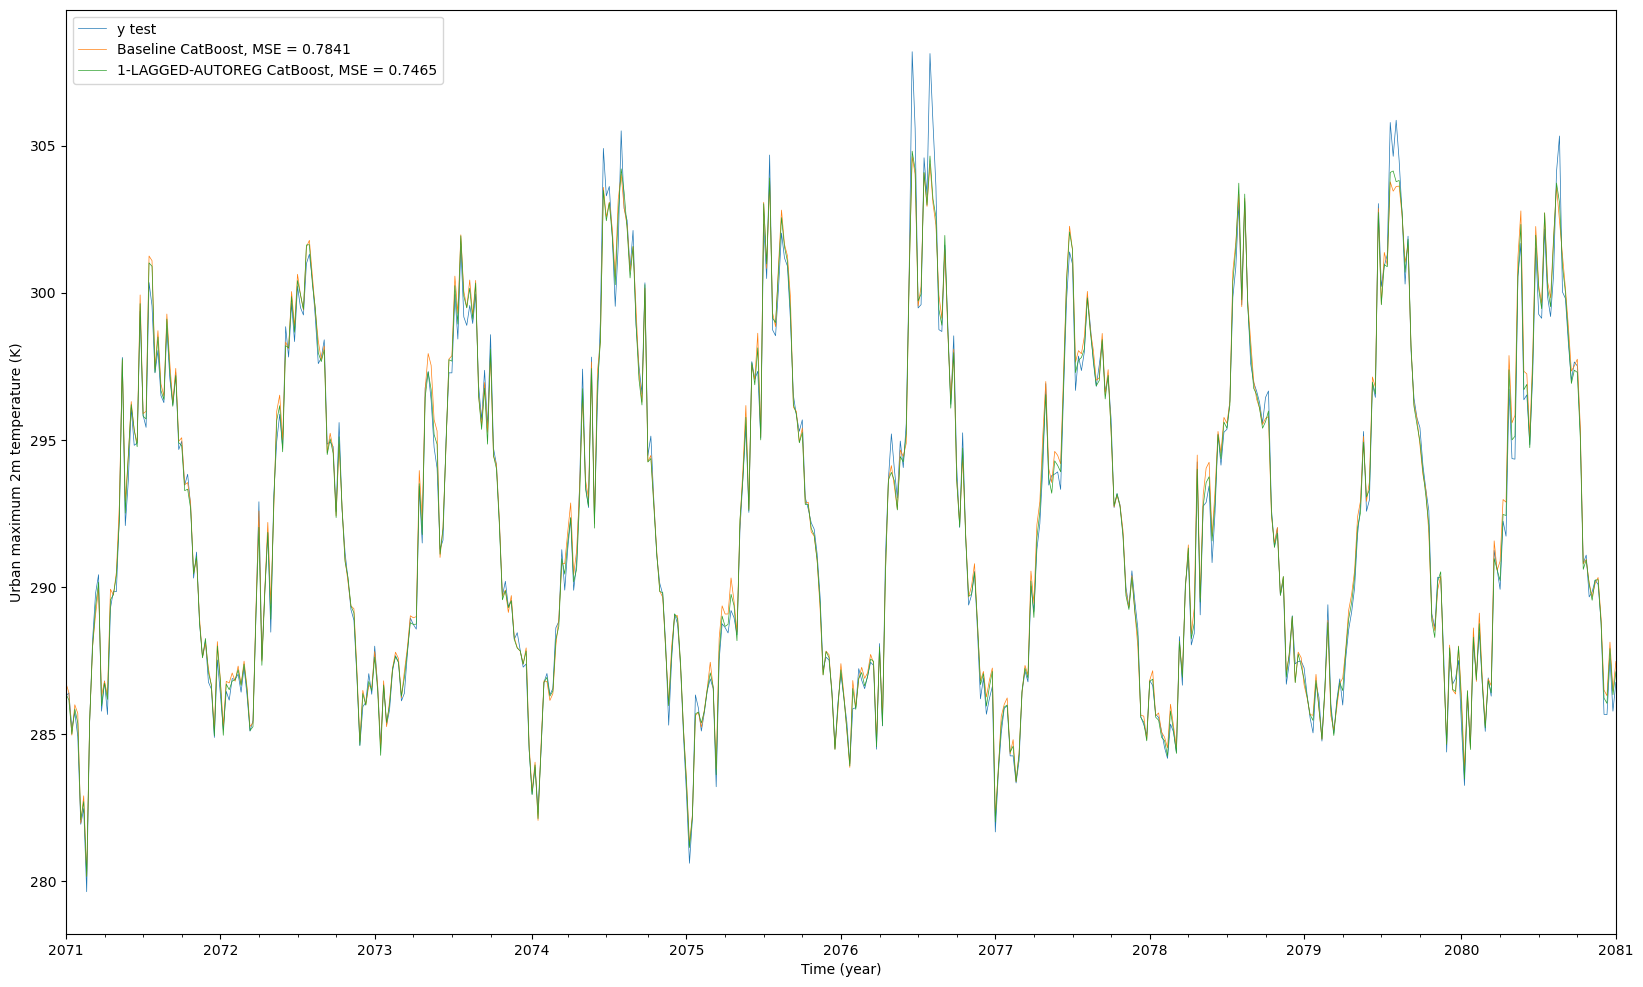

In [16]:
ax = baseline_vs_lagged_autoreg_ts_weekly_mean.plot(figsize=(20,12),lw=0.5)
ax.legend(['y test', 'Baseline CatBoost, MSE = 0.7841', '1-LAGGED-AUTOREG CatBoost, MSE = 0.7465'], loc="upper left")
ax.set_xlabel("Time (year)")
ax.set_ylabel("Urban maximum 2m temperature (K)")
plt.savefig('y true vs baseline vs 1-lagged-autoreg catboost weekly mean (ensemble 32).png', bbox_inches = 'tight')

#### Visualise "best performance" member 5

In [17]:
##Grabbing 'lowest error' member 5
lagged_autoreg_catboost_london_5 = lagged_autoreg_catboost_london.loc[lagged_autoreg_catboost_london['Ensemble_num']==5]
##Set time index
lagged_autoreg_catboost_london_5 = lagged_autoreg_catboost_london_5.set_index('time')
##Remove unecessary columns
lagged_autoreg_catboost_london_5 = lagged_autoreg_catboost_london_5.drop(columns=['lat','lon','Ensemble_num']) ##Keeping 'TREFMXAV_U' (y true) column once
##Re-naming columns
lagged_autoreg_catboost_london_5 = lagged_autoreg_catboost_london_5.rename(columns={'TREFMXAV_U': 'y test', 'y_pred': '1-LAGGED-AUTOREG CatBoost'})

#### Visualise "worst performance" member 16

In [18]:
##Grabbing 'highest error'
lagged_autoreg_catboost_london_16 = lagged_autoreg_catboost_london.loc[lagged_autoreg_catboost_london['Ensemble_num']==16]
##Set time index
lagged_autoreg_catboost_london_16 = lagged_autoreg_catboost_london_16.set_index('time')
##Remove unecessary columns
lagged_autoreg_catboost_london_16 = lagged_autoreg_catboost_london_16.drop(columns=['lat','lon','Ensemble_num']) ##Keeping 'TREFMXAV_U' (y true) column once
##Re-naming columns
lagged_autoreg_catboost_london_16 = lagged_autoreg_catboost_london_16.rename(columns={'TREFMXAV_U': 'y test', 'y_pred': '1-LAGGED-AUTOREG CatBoost'})

## LightGBM

## Load in y_pred(s)

### Baseline LightGBM

In [19]:
baseline_lgbm = pd.read_csv('y_pred_reg_lgbm.csv', index_col=0)
##Convert 'time' to datetime
baseline_lgbm['time'] = pd.to_datetime(baseline_lgbm['time'])
#display(baseline_lgbm)

### 1-AUTOREG LightGBM

In [20]:
autoreg_lgbm = pd.read_csv('y_pred_1-autoreg_lgbm.csv', index_col=0)
##Convert 'time' to datetime
autoreg_lgbm['time'] = pd.to_datetime(autoreg_lgbm['time'])
#display(autoreg_lgbm)

In [21]:
##Group Baseline LightGBM predictions by ensemble member and calculate MSE
baseline_lgbm_ensemble = analysis_member(baseline_lgbm)
##Group 1-AUTOREG CatBoost predictions by ensemble member and calculate MSE
autoreg_lgbm_ensemble = analysis_member(autoreg_lgbm)

##Calculating biggest improvements in MSE score from Baseline to 1-AUTOREG
##Concatenate together the tables reporting MSE per ensemble member
baseline_vs_autoreg = pd.concat([baseline_lgbm_ensemble,autoreg_lgbm_ensemble],axis=1)
## Renaming column as ensemble member number
baseline_vs_autoreg.columns.values[0] = "Baseline"
baseline_vs_autoreg.columns.values[1] = "1-AUTOREG"
##Calculate the difference between the two columns
baseline_vs_autoreg['Difference'] = baseline_vs_autoreg['Baseline'] - baseline_vs_autoreg['1-AUTOREG']
##Viewing in term s of worse overall prediction of MSE member by 1-AUTOREG LightGBM
print("MSE per ensemble member ordered by overall worse-predicted members:")
display(baseline_vs_autoreg.sort_values(by='1-AUTOREG',ascending=False))
##Viewing in terms of which ensemble member prediction improved the most
print("MSE per ensemble member ordered by most improved relative to Baseline:")
display(baseline_vs_autoreg.sort_values(by='Difference',ascending=False))
##Save to table for report
baseline_vs_autoreg.to_csv('LightGBM emulator MSE comparison.csv')

MSE per ensemble member ordered by overall worse-predicted members:


Baseline  1-AUTOREG  Difference
Ensemble number                                 
16               0.993428   0.966039    0.027389
28               0.936434   0.934133    0.002301
6                0.957999   0.931688    0.026310
32               0.973238   0.930293    0.042945
14               0.929487   0.920484    0.009003
17               0.938209   0.918429    0.019780
9                0.930743   0.910963    0.019780
7                0.914853   0.904012    0.010841
19               0.933698   0.899821    0.033876
29               0.934072   0.897047    0.037025
22               0.911786   0.890499    0.021287
8                0.889265   0.887602    0.001663
23               0.905283   0.887384    0.017899
21               0.899883   0.886420    0.013463
31               0.905574   0.885452    0.020123
24               0.908343   0.883619    0.024723
10               0.896546   0.880874    0.015672
3                0.883676   0.876194    0.007482
15               0.897097   0.873525    0.023572
26               0.879495   0.873369    0.006126
11               0.892599   0.870951    0.021648
25               0.887173   0.870326    0.016847
4                0.890633   0.861400    0.029234
12               0.861155   0.856925    0.004230
20               0.877758   0.856742    0.021015
33               0.861583   0.841074    0.020509
13               0.839427   0.836515    0.002912
30               0.855850   0.836249    0.019601
27               0.840296   0.834161    0.006135
18               0.836807   0.831775    0.005032
5                0.819261   0.819223    0.000038

MSE per ensemble member ordered by most improved relative to Baseline:


Baseline  1-AUTOREG  Difference
Ensemble number                                 
32               0.973238   0.930293    0.042945
29               0.934072   0.897047    0.037025
19               0.933698   0.899821    0.033876
4                0.890633   0.861400    0.029234
16               0.993428   0.966039    0.027389
6                0.957999   0.931688    0.026310
24               0.908343   0.883619    0.024723
15               0.897097   0.873525    0.023572
11               0.892599   0.870951    0.021648
22               0.911786   0.890499    0.021287
20               0.877758   0.856742    0.021015
33               0.861583   0.841074    0.020509
31               0.905574   0.885452    0.020123
17               0.938209   0.918429    0.019780
9                0.930743   0.910963    0.019780
30               0.855850   0.836249    0.019601
23               0.905283   0.887384    0.017899
25               0.887173   0.870326    0.016847
10               0.896546   0.880874    0.015672
21               0.899883   0.886420    0.013463
7                0.914853   0.904012    0.010841
14               0.929487   0.920484    0.009003
3                0.883676   0.876194    0.007482
27               0.840296   0.834161    0.006135
26               0.879495   0.873369    0.006126
18               0.836807   0.831775    0.005032
12               0.861155   0.856925    0.004230
13               0.839427   0.836515    0.002912
28               0.936434   0.934133    0.002301
8                0.889265   0.887602    0.001663
5                0.819261   0.819223    0.000038

Again, member 32 is the "most improved" member so we'll look at this further as a time series plot.

In [22]:
##Baseline LightGBM vs 1-AUTOREG LightGBM

##Grabbing London dates of Baseline LightGBM 
baseline_lgbm_london = baseline_lgbm.loc[(baseline_lgbm['lat']>51)&(baseline_lgbm['lat']<52)&(baseline_lgbm['lon']==0)]
##Grabbing London dates of 1-AUTOREG LightGBM 
lagged_autoreg_lgbm_london = autoreg_lgbm.loc[(autoreg_lgbm['lat']>51)&(autoreg_lgbm['lat']<52)&(autoreg_lgbm['lon']==0)]
##Grabbing 'most improved' ensemble member 32 from both
baseline_lgbm_london_32 = baseline_lgbm_london.loc[baseline_lgbm_london['Ensemble_num']==32]
lagged_autoreg_lgbm_32 = lagged_autoreg_lgbm_london.loc[lagged_autoreg_lgbm_london['Ensemble_num']==32]
##Set time index
baseline_lgbm_london_32 = baseline_lgbm_london_32.set_index('time')
lagged_autoreg_lgbm_32 = lagged_autoreg_lgbm_32.set_index('time')
##Remove unecessary columns
baseline_lgbm_london_32 = baseline_lgbm_london_32.drop(columns=['lat','lon','Ensemble_num']) ##Keeping 'TREFMXAV_U' (y true) column once
lagged_autoreg_lgbm_32 = lagged_autoreg_lgbm_32.drop(columns=['lat','lon','Ensemble_num','TREFMXAV_U']) ##Keeping y_pred column once
##Re-naming columns
baseline_lgbm_london_32 = baseline_lgbm_london_32.rename(columns={'TREFMXAV_U': 'y test', 'y_pred': 'Baseline LightGBM'})
lagged_autoreg_lgbm_32 = lagged_autoreg_lgbm_32.rename(columns={'y_pred': '1-AUTOREG LightGBM'})

##Concatenate together column-next
baseline_vs_autoreg_ts = pd.concat([baseline_lgbm_london_32,lagged_autoreg_lgbm_32],axis=1).dropna()   ##Must remove rows with NaN (because 1-lag day removes 1 day)

display(baseline_vs_autoreg_ts)

y test  Baseline LightGBM  1-AUTOREG LightGBM
time                                                        
2071-01-01  286.54922         288.434498          287.701172
2071-01-02  288.59940         288.600934          288.301577
2071-01-03  284.86813         284.810186          285.755755
2071-01-04  285.39297         285.938232          285.678096
2071-01-05  286.99170         286.856777          286.615337
...               ...                ...                 ...
2080-12-27  285.78497         286.021603          285.932812
2080-12-28  285.51950         285.511749          285.383793
2080-12-29  287.41840         288.223392          287.756922
2080-12-30  287.50967         288.011633          287.767761
2080-12-31  286.01340         286.482315          286.745122

[3650 rows x 3 columns]

### Comparing Baseline to improved temporal model

Daily records

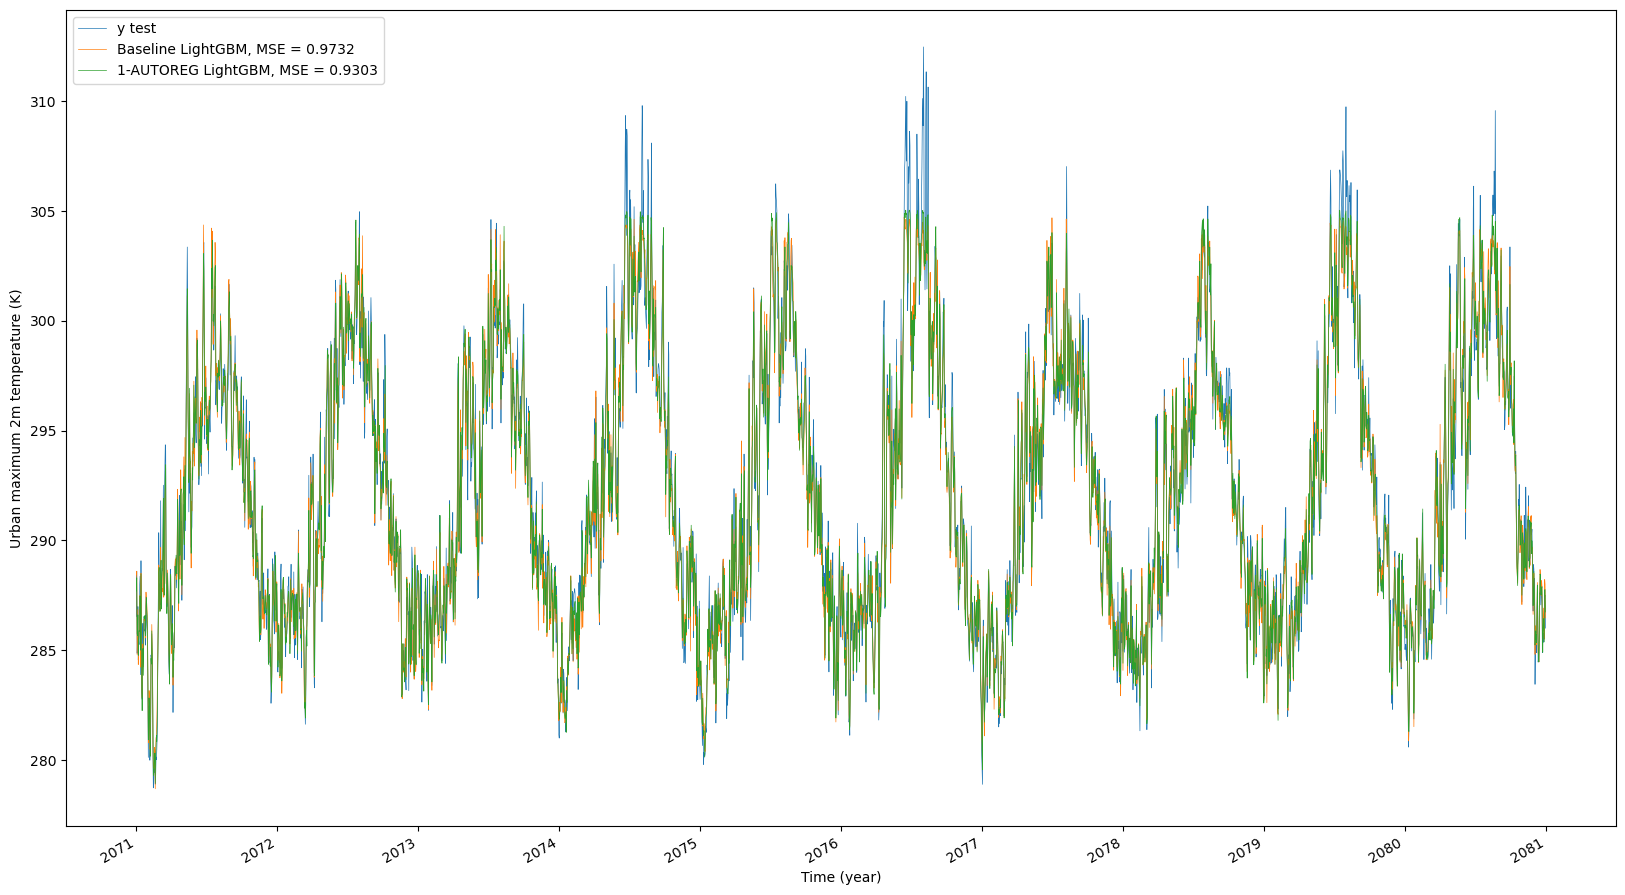

In [23]:
ax = baseline_vs_autoreg_ts.plot(figsize=(20,12),lw=0.5)
ax.legend(['y test', 'Baseline LightGBM, MSE = 0.9732', '1-AUTOREG LightGBM, MSE = 0.9303'], loc="upper left")
ax.set_xlabel("Time (year)")
ax.set_ylabel("Urban maximum 2m temperature (K)")
plt.savefig('y true vs baseline vs 1-autoreg lgbm daily (ensemble 32).png', bbox_inches = 'tight')

Calculating weekly-averages

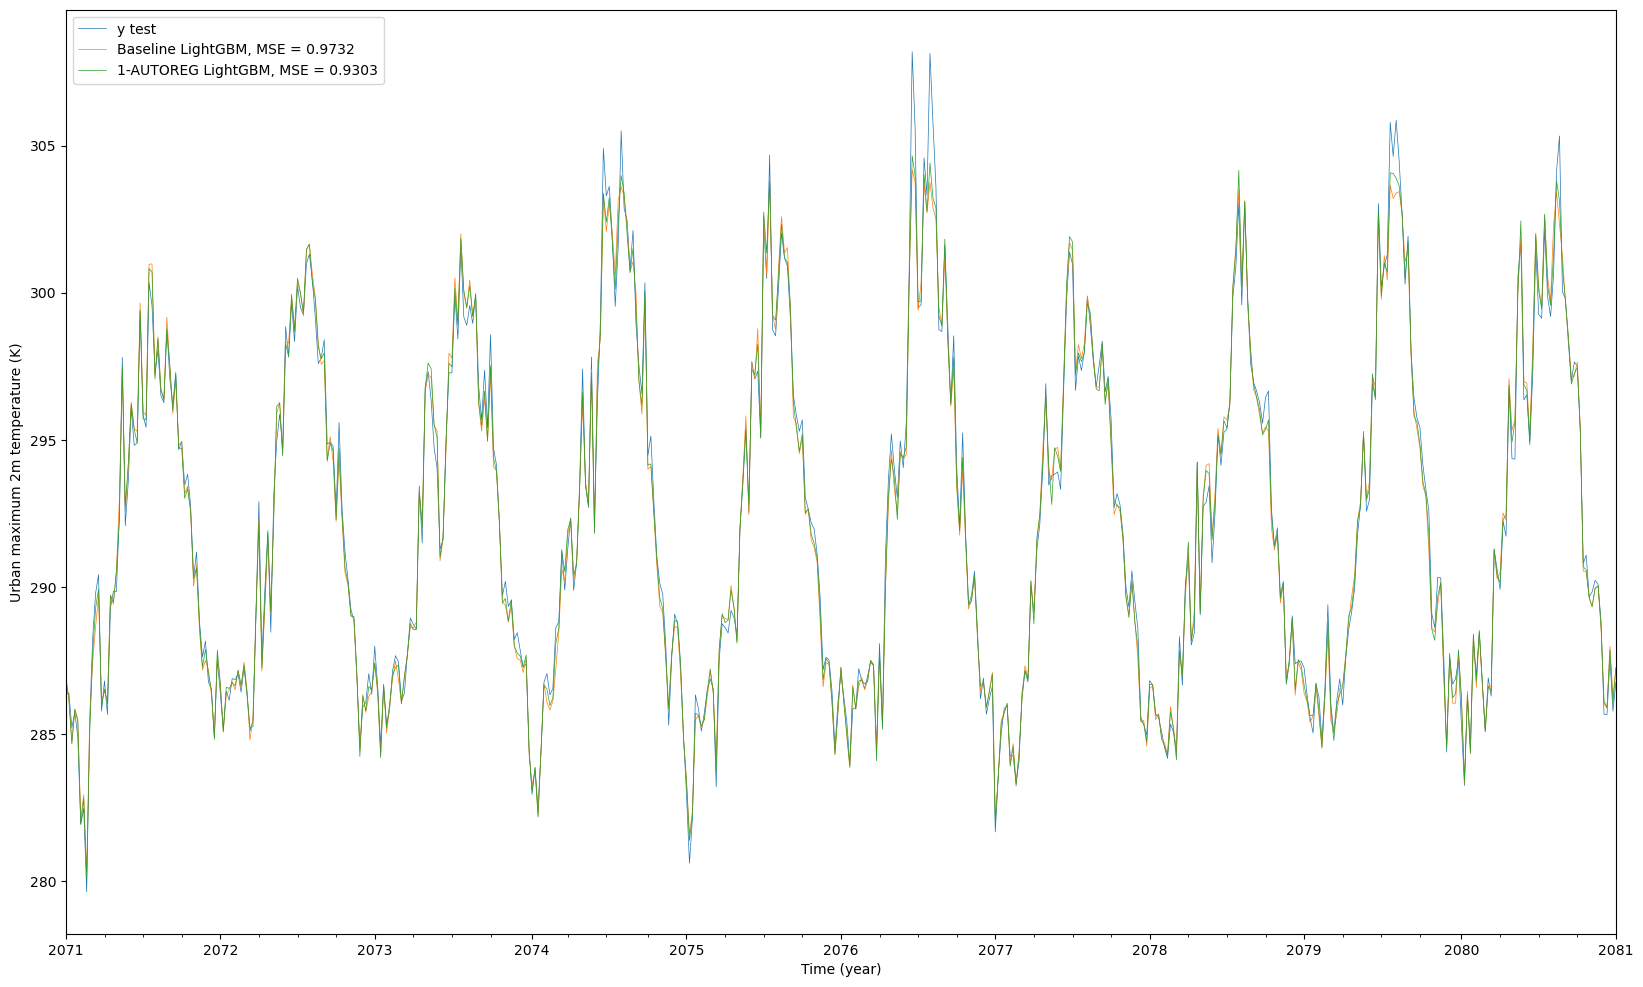

In [24]:
baseline_vs_autoreg_ts_weekly_mean = baseline_vs_autoreg_ts.groupby(pd.Grouper(freq="W"))[['y test','Baseline LightGBM','1-AUTOREG LightGBM']].mean()
#display(baseline_vs_autoreg_ts_weekly_mean)

ax = baseline_vs_autoreg_ts_weekly_mean.plot(figsize=(20,12),lw=0.5)
ax.legend(['y test', 'Baseline LightGBM, MSE = 0.9732', '1-AUTOREG LightGBM, MSE = 0.9303'], loc="upper left")
ax.set_xlabel("Time (year)")
ax.set_ylabel("Urban maximum 2m temperature (K)")
plt.savefig('y true vs baseline vs 1-autoreg lgbm weekly mean (ensemble 32).png', bbox_inches = 'tight')

The slight difference is that 1-AUTOREG LightGBM edges slightly closer to the highest peaks of y test

#### Visualise "best performance" member 5

In [25]:
##Grabbing 'lowest error' member 5
lagged_autoreg_lgbm_london_5 = lagged_autoreg_lgbm_london.loc[lagged_autoreg_lgbm_london['Ensemble_num']==5]
##Set time index
lagged_autoreg_lgbm_london_5 = lagged_autoreg_lgbm_london_5.set_index('time')
##Remove unecessary columns
lagged_autoreg_lgbm_london_5 = lagged_autoreg_lgbm_london_5.drop(columns=['lat','lon','Ensemble_num']) ##Keeping 'TREFMXAV_U' (y true) column once
##Re-naming columns
lagged_autoreg_lgbm_london_5 = lagged_autoreg_lgbm_london_5.rename(columns={'TREFMXAV_U': 'y test', 'y_pred': '1-AUTOREG LightGBM'})

#### Visualise "worst performance" member 16

In [26]:
##Grabbing 'highest error'
lagged_autoreg_lgbm_london_16 = lagged_autoreg_lgbm_london.loc[lagged_autoreg_lgbm_london['Ensemble_num']==16]
##Set time index
lagged_autoreg_lgbm_london_16 = lagged_autoreg_lgbm_london_16.set_index('time')
##Remove unecessary columns
lagged_autoreg_lgbm_london_16 = lagged_autoreg_lgbm_london_16.drop(columns=['lat','lon','Ensemble_num']) ##Keeping 'TREFMXAV_U' (y true) column once
##Re-naming columns
lagged_autoreg_lgbm_london_16 = lagged_autoreg_lgbm_london_16.rename(columns={'TREFMXAV_U': 'y test', 'y_pred': '1-AUTOREG LightGBM'})

## XGBoost

## Loading in y_pred(s)

### XGBoost Baseline

In [27]:
baseline_xgboost = pd.read_csv('y_pred_reg_xgboost.csv', index_col=0)
##Convert 'time' to datetime
baseline_xgboost['time'] = pd.to_datetime(baseline_xgboost['time'])
display(baseline_xgboost)

time        lat   lon  Ensemble_num  TREFMXAV_U     y_pred
1233648  2071-01-01  49.476440 -1.25             3   289.56570  286.72635
1233649  2071-01-01  49.476440  0.00             3   289.26990  287.35995
1233650  2071-01-01  49.476440  1.25             3   287.94110  287.30870
1233651  2071-01-01  50.418850 -5.00             3   286.99823  284.72113
1233652  2071-01-01  50.418850 -3.75             3   288.30580  286.20886
...             ...        ...   ...           ...         ...        ...
44126883 2080-12-31  57.958115 -6.25            33   281.49220  280.58435
44126884 2080-12-31  57.958115 -3.75            33   280.94980  280.24005
44126885 2080-12-31  57.958115 -2.50            33   281.72986  281.68427
44126886 2080-12-31  57.958115 -1.25            33   282.41420  282.05975
44126887 2080-12-31  58.900524 -3.75            33   282.37146  281.85587

[5883800 rows x 6 columns]

In [65]:
##Group Baseline XGBoost predictions by ensemble member and calculate MSE
baseline_xgboost_ensemble = analysis_member(baseline_xgboost)
## Renaming column
baseline_xgboost_ensemble.columns.values[0] = "Baseline"

display(baseline_xgboost_ensemble.sort_values(by='Baseline', ascending=False))
##(We're not comparing to any lagged/autoregressive model here because no improvements found)
##Save to table for report
baseline_xgboost_ensemble.to_csv('XGBoost emulator MSE comparison.csv')

Baseline
Ensemble number          
16               0.846267
32               0.808929
6                0.804952
28               0.790191
9                0.789737
29               0.784722
7                0.781241
17               0.779342
14               0.775059
21               0.771689
22               0.768419
31               0.767063
19               0.766824
23               0.766421
24               0.765702
8                0.754800
10               0.753033
11               0.748832
15               0.747038
3                0.745128
20               0.736987
4                0.735004
25               0.734576
26               0.731328
12               0.729069
30               0.723347
33               0.718655
13               0.712151
27               0.711174
18               0.702927
5                0.694182

#### Visualise "best performance" member 5

In [29]:
##Grabbing London dates of Baseline XGBoost
baseline_xgboost_london = baseline_xgboost.loc[(baseline_xgboost['lat']>51)&(baseline_xgboost['lat']<52)&(baseline_xgboost['lon']==0)]
##Grabbing 'best performance' ensemble member 5
baseline_xgboost_london_5 = baseline_xgboost_london.loc[baseline_xgboost_london['Ensemble_num']==5]
##Set time index
baseline_xgboost_london_5 = baseline_xgboost_london_5.set_index('time')
##Remove unecessary columns
baseline_xgboost_london_5 = baseline_xgboost_london_5.drop(columns=['lat','lon','Ensemble_num']) ##Keeping 'TREFMXAV_U' (y true) column once
##Re-naming columns
baseline_xgboost_london_5 = baseline_xgboost_london_5.rename(columns={'TREFMXAV_U': 'y test', 'y_pred': 'Baseline XGBoost'})

#### Visualise "worst performance" member 16

In [30]:
##Grabbing 'worst performance' ensemble member 16
baseline_xgboost_london_16 = baseline_xgboost_london.loc[baseline_xgboost_london['Ensemble_num']==16]
##Set time index
baseline_xgboost_london_16 = baseline_xgboost_london_16.set_index('time')
##Remove unecessary columns
baseline_xgboost_london_16 = baseline_xgboost_london_16.drop(columns=['lat','lon','Ensemble_num']) ##Keeping 'TREFMXAV_U' (y true) column once
##Re-naming columns
baseline_xgboost_london_16 = baseline_xgboost_london_16.rename(columns={'TREFMXAV_U': 'y test', 'y_pred': 'Baseline XGBoost'})

### Sub-plot of "worst performance" member 16 for 1-LAGGED-AUTOREG CatBoost, Baseline XGBoost and 1-AUTOREG LighGBM

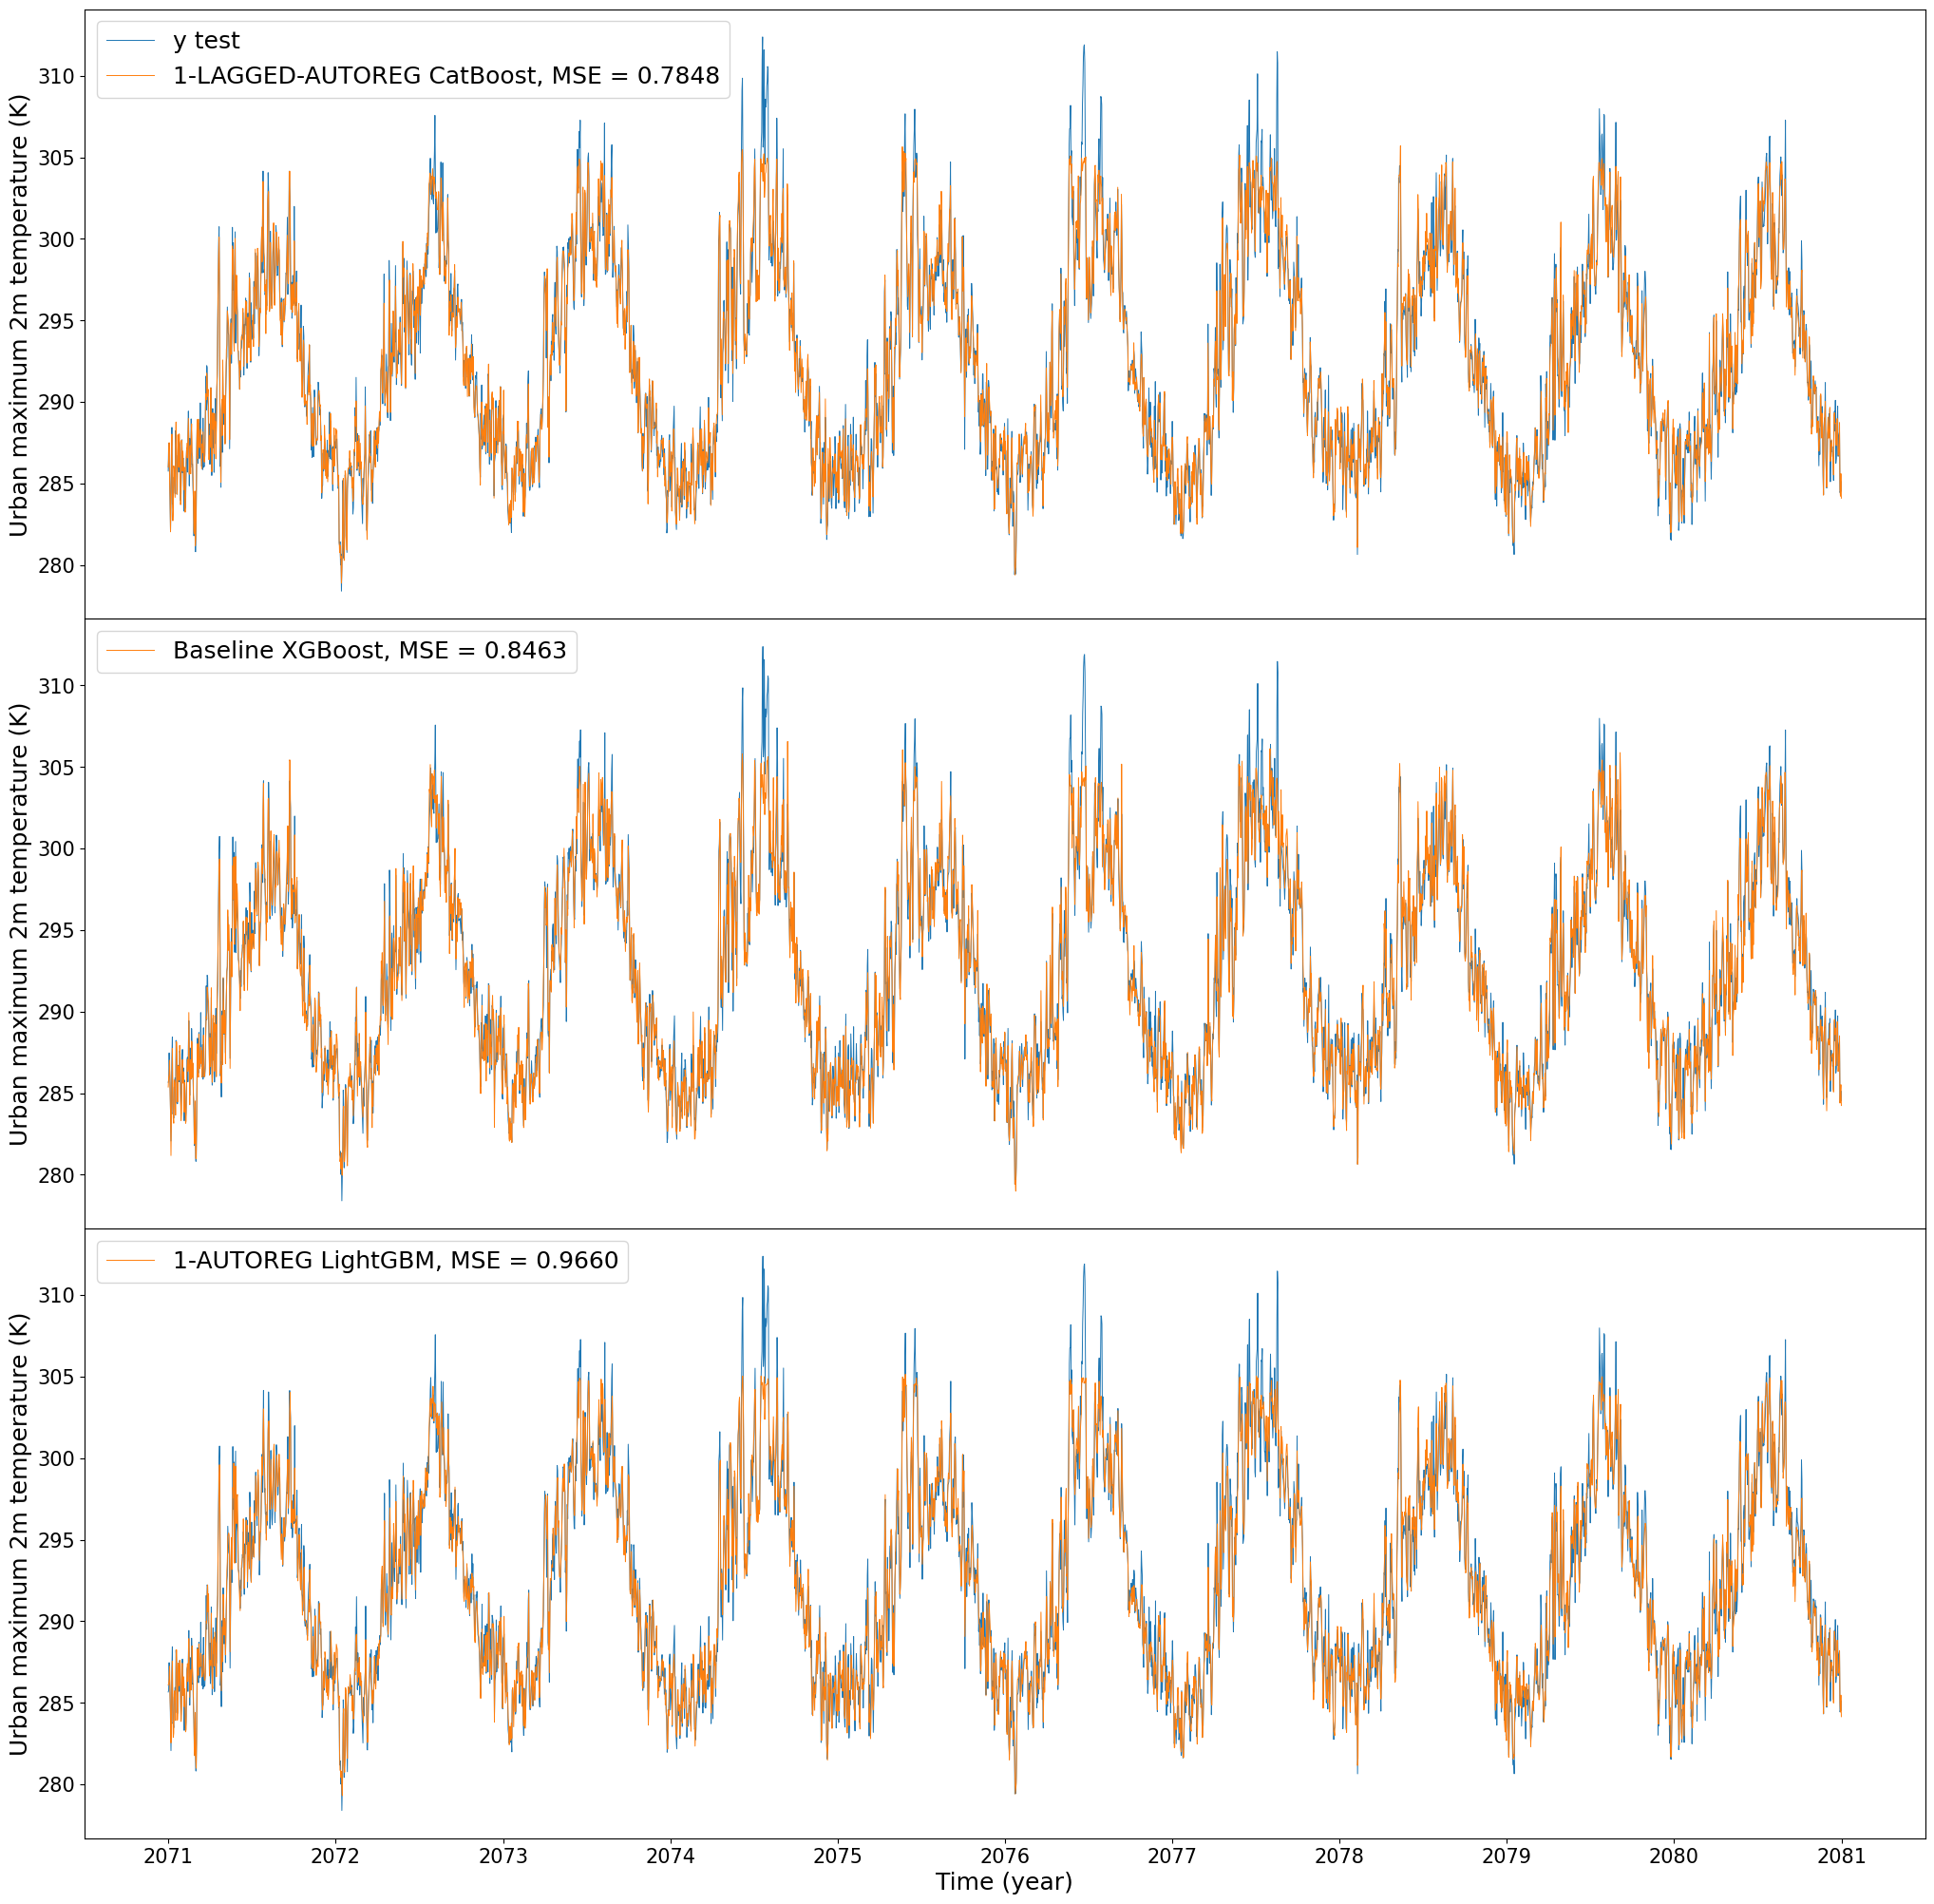

In [66]:
fig, axs = plt.subplots(3,1, figsize=(25, 25),sharey=True)

axs[0].plot(lagged_autoreg_catboost_london_16['y test'], lw=0.7, label='y test')
axs[0].plot(lagged_autoreg_catboost_london_16['1-LAGGED-AUTOREG CatBoost'], lw=0.7, label = '1-LAGGED-AUTOREG CatBoost, MSE = 0.7848')
axs[0].legend(loc="upper left", fontsize=18)
axs[0].set_ylabel("Urban maximum 2m temperature (K)",fontsize=18)
#axs[0].set_yticklabels(fontsize=15)

axs[1].plot(baseline_xgboost_london_16['y test'], lw=0.7)
axs[1].plot(baseline_xgboost_london_16['Baseline XGBoost'], lw=0.7, label='Baseline XGBoost, MSE = 0.8463')
axs[1].legend(loc="upper left", fontsize=18)
axs[1].set_ylabel("Urban maximum 2m temperature (K)",fontsize=18)
#axs[1].set_yticklabels(fontsize=15)

axs[2].plot(lagged_autoreg_lgbm_london_16['y test'], lw=0.7)
axs[2].plot(lagged_autoreg_lgbm_london_16['1-AUTOREG LightGBM'], lw=0.7, label='1-AUTOREG LightGBM, MSE = 0.9660')
axs[2].legend(loc="upper left", fontsize=18)
axs[2].set_xlabel('Time (year)',fontsize=18)
axs[2].set_ylabel("Urban maximum 2m temperature (K)",fontsize=18)
#axs[2].set_yticklabels(fontsize=15)
#axs[2].set_xticklabels(fontsize=15)
plt.rcParams.update({'font.size': 15})
#axs[2].get_xticklabels().set_fontsize(15)

##Reduce space in-between subplots
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('Comparison of ensemble performance (ensemble 16).png', bbox_inches = 'tight')

Re-plotting with weekly averages

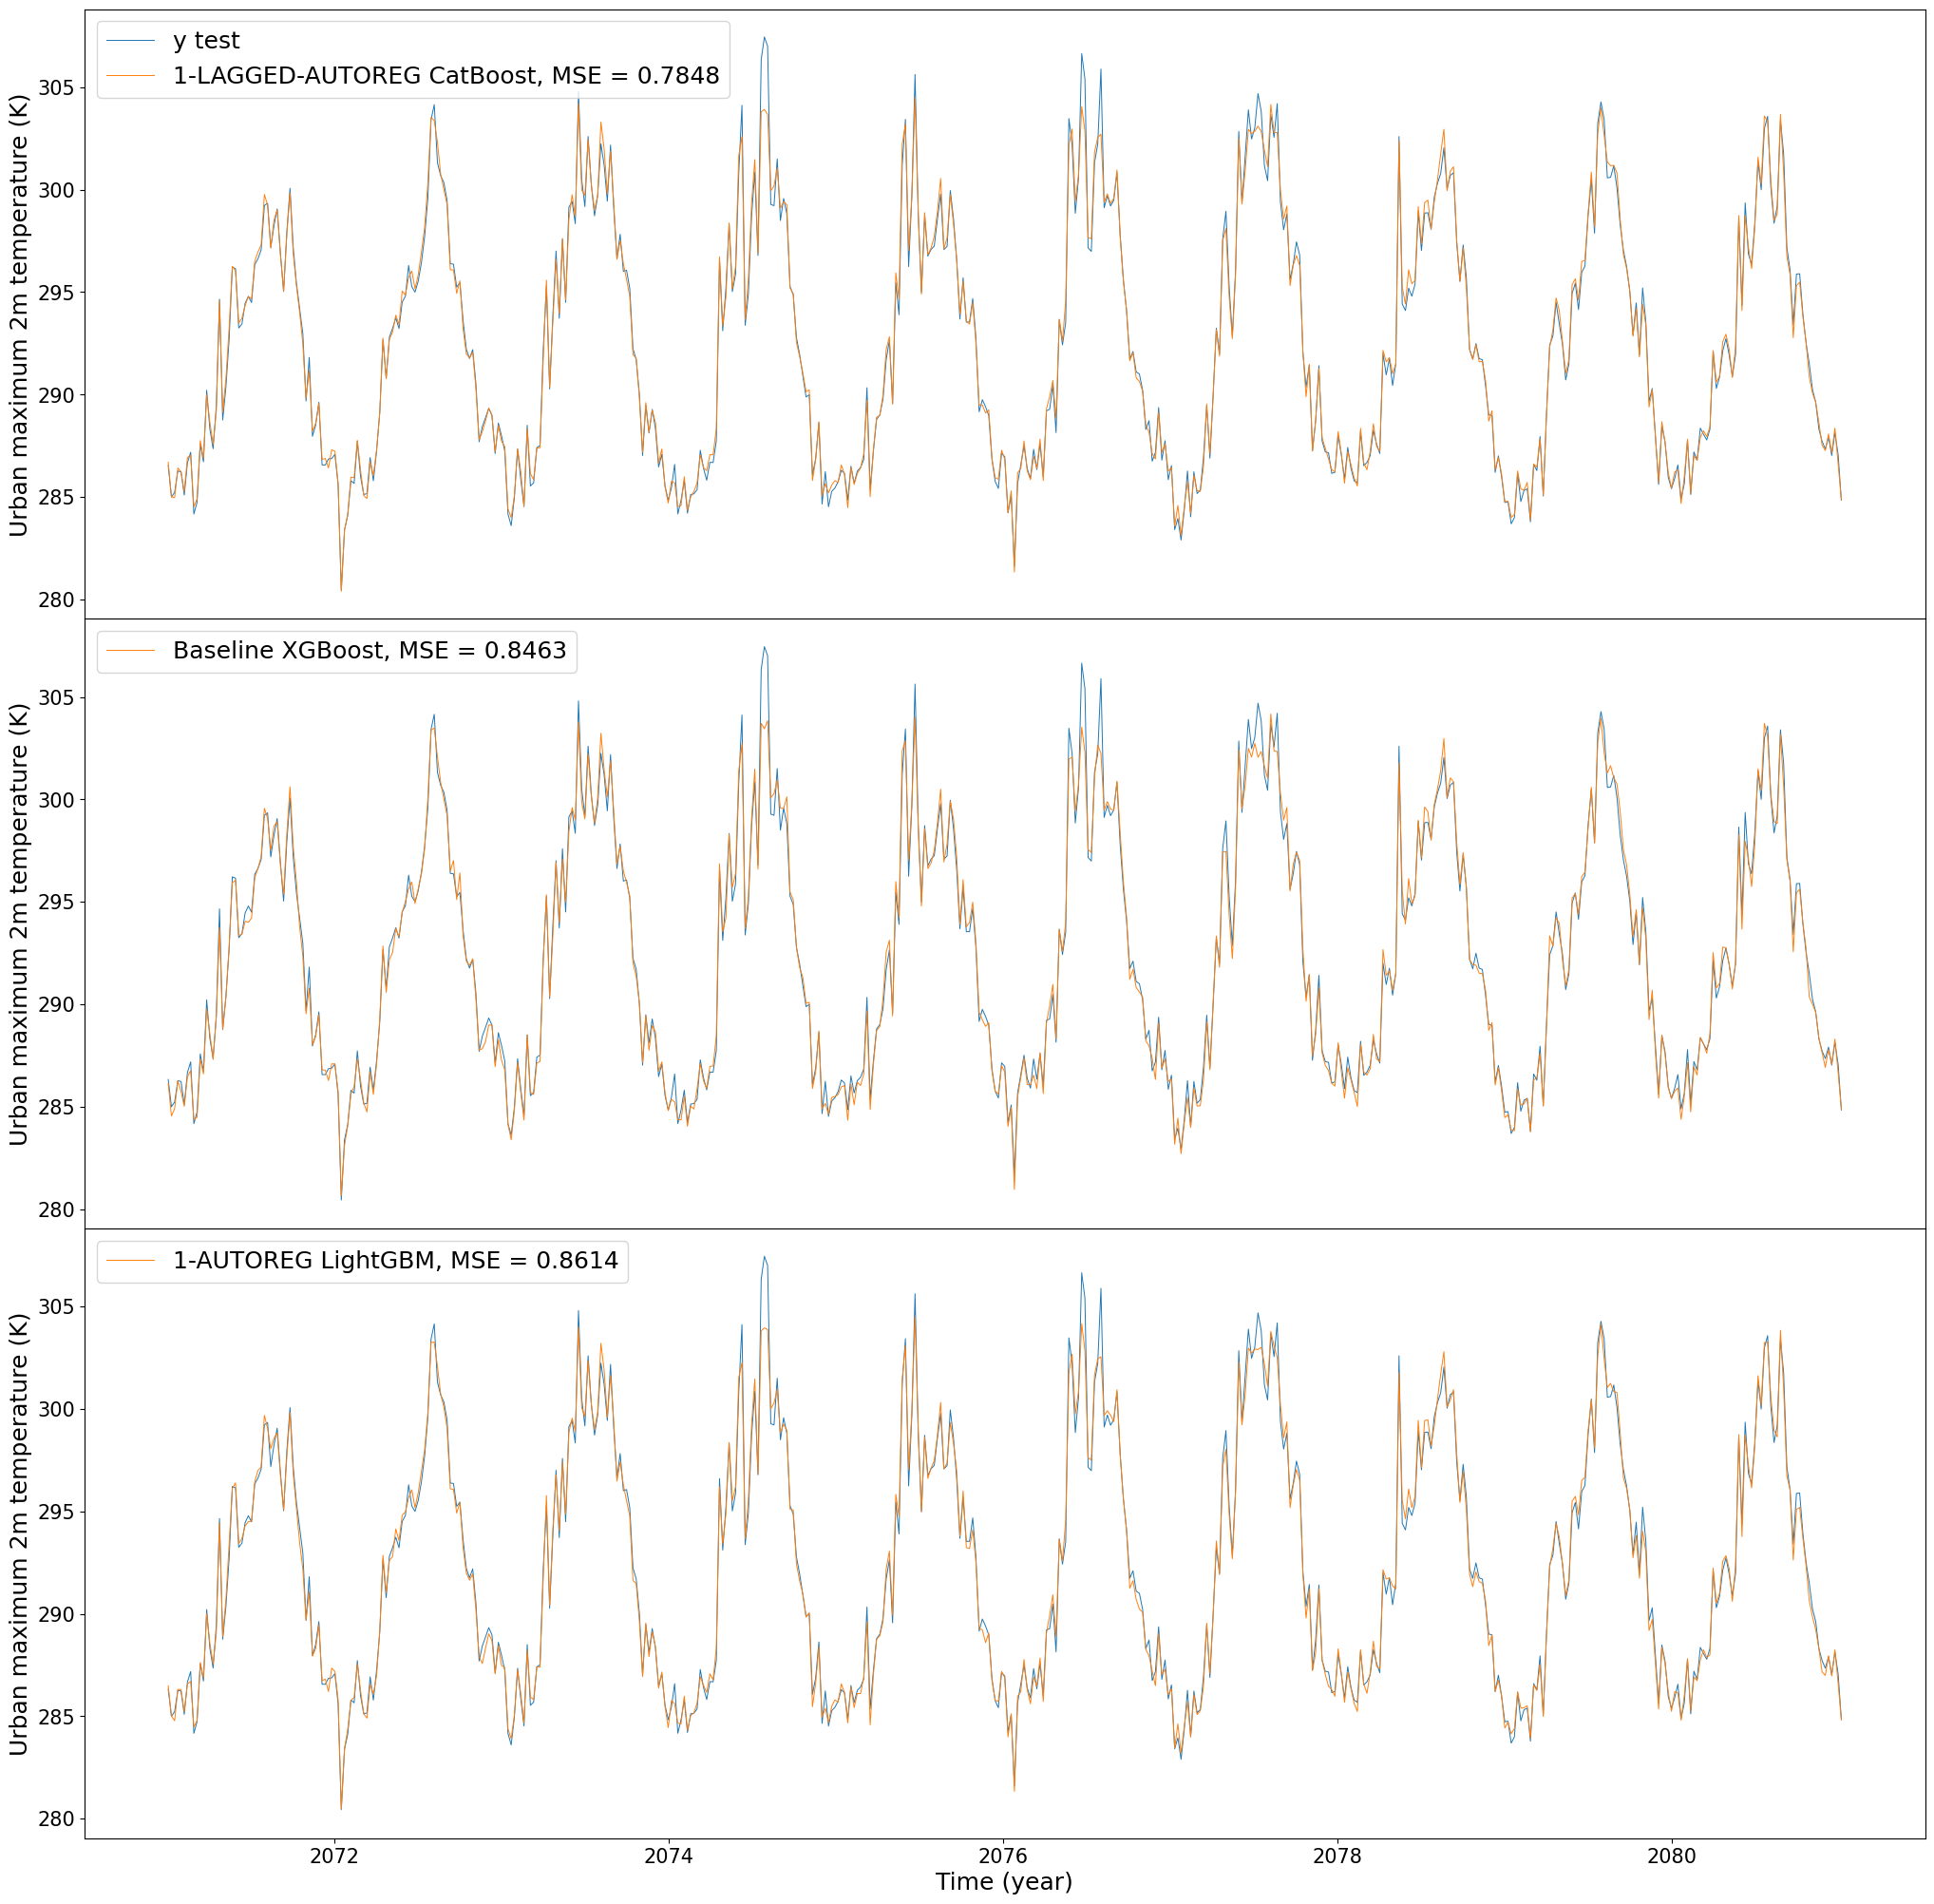

In [32]:
fig, axs = plt.subplots(3,1, figsize=(25, 25),sharey=True)

##Calculating weekly-averages
lagged_autoreg_catboost_london_16_weekly_mean = lagged_autoreg_catboost_london_16.groupby(pd.Grouper(freq="W"))[['y test','1-LAGGED-AUTOREG CatBoost']].mean()
baseline_xgboost_london_16_weekly_mean = baseline_xgboost_london_16.groupby(pd.Grouper(freq="W"))[['y test','Baseline XGBoost']].mean()
lagged_autoreg_lgbm_london_16_weekly_mean = lagged_autoreg_lgbm_london_16.groupby(pd.Grouper(freq="W"))[['y test','1-AUTOREG LightGBM']].mean()

axs[0].plot(lagged_autoreg_catboost_london_16_weekly_mean['y test'], lw=0.7, label='y test')
axs[0].plot(lagged_autoreg_catboost_london_16_weekly_mean['1-LAGGED-AUTOREG CatBoost'], lw=0.7, label = '1-LAGGED-AUTOREG CatBoost, MSE = 0.7848')
axs[0].legend(loc="upper left", fontsize=18)
axs[0].set_ylabel("Urban maximum 2m temperature (K)",fontsize=18)
#axs[0].set_yticklabels(fontsize=15)

axs[1].plot(baseline_xgboost_london_16_weekly_mean['y test'], lw=0.7)
axs[1].plot(baseline_xgboost_london_16_weekly_mean['Baseline XGBoost'], lw=0.7, label='Baseline XGBoost, MSE = 0.8463')
axs[1].legend(loc="upper left", fontsize=18)
axs[1].set_ylabel("Urban maximum 2m temperature (K)",fontsize=18)
#axs[1].set_yticklabels(fontsize=15)

axs[2].plot(lagged_autoreg_lgbm_london_16_weekly_mean['y test'], lw=0.7)
axs[2].plot(lagged_autoreg_lgbm_london_16_weekly_mean['1-AUTOREG LightGBM'], lw=0.7, label='1-AUTOREG LightGBM, MSE = 0.8614')
axs[2].legend(loc="upper left", fontsize=18)
axs[2].set_xlabel('Time (year)',fontsize=18)
axs[2].set_ylabel("Urban maximum 2m temperature (K)",fontsize=18)
#axs[2].set_yticklabels(fontsize=15)
#axs[2].set_xticklabels(fontsize=15)
plt.rcParams.update({'font.size': 15})
#axs[2].get_xticklabels().set_fontsize(15)

##Reduce space in-between subplots
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('Comparison of ensemble performance weekly mean (ensemble 16).png', bbox_inches = 'tight')

### Sub-plot of "best performance" member 5 for 1-LAGGED-AUTOREG CatBoost, Baseline XGBoost and 1-AUTOREG LighGBM

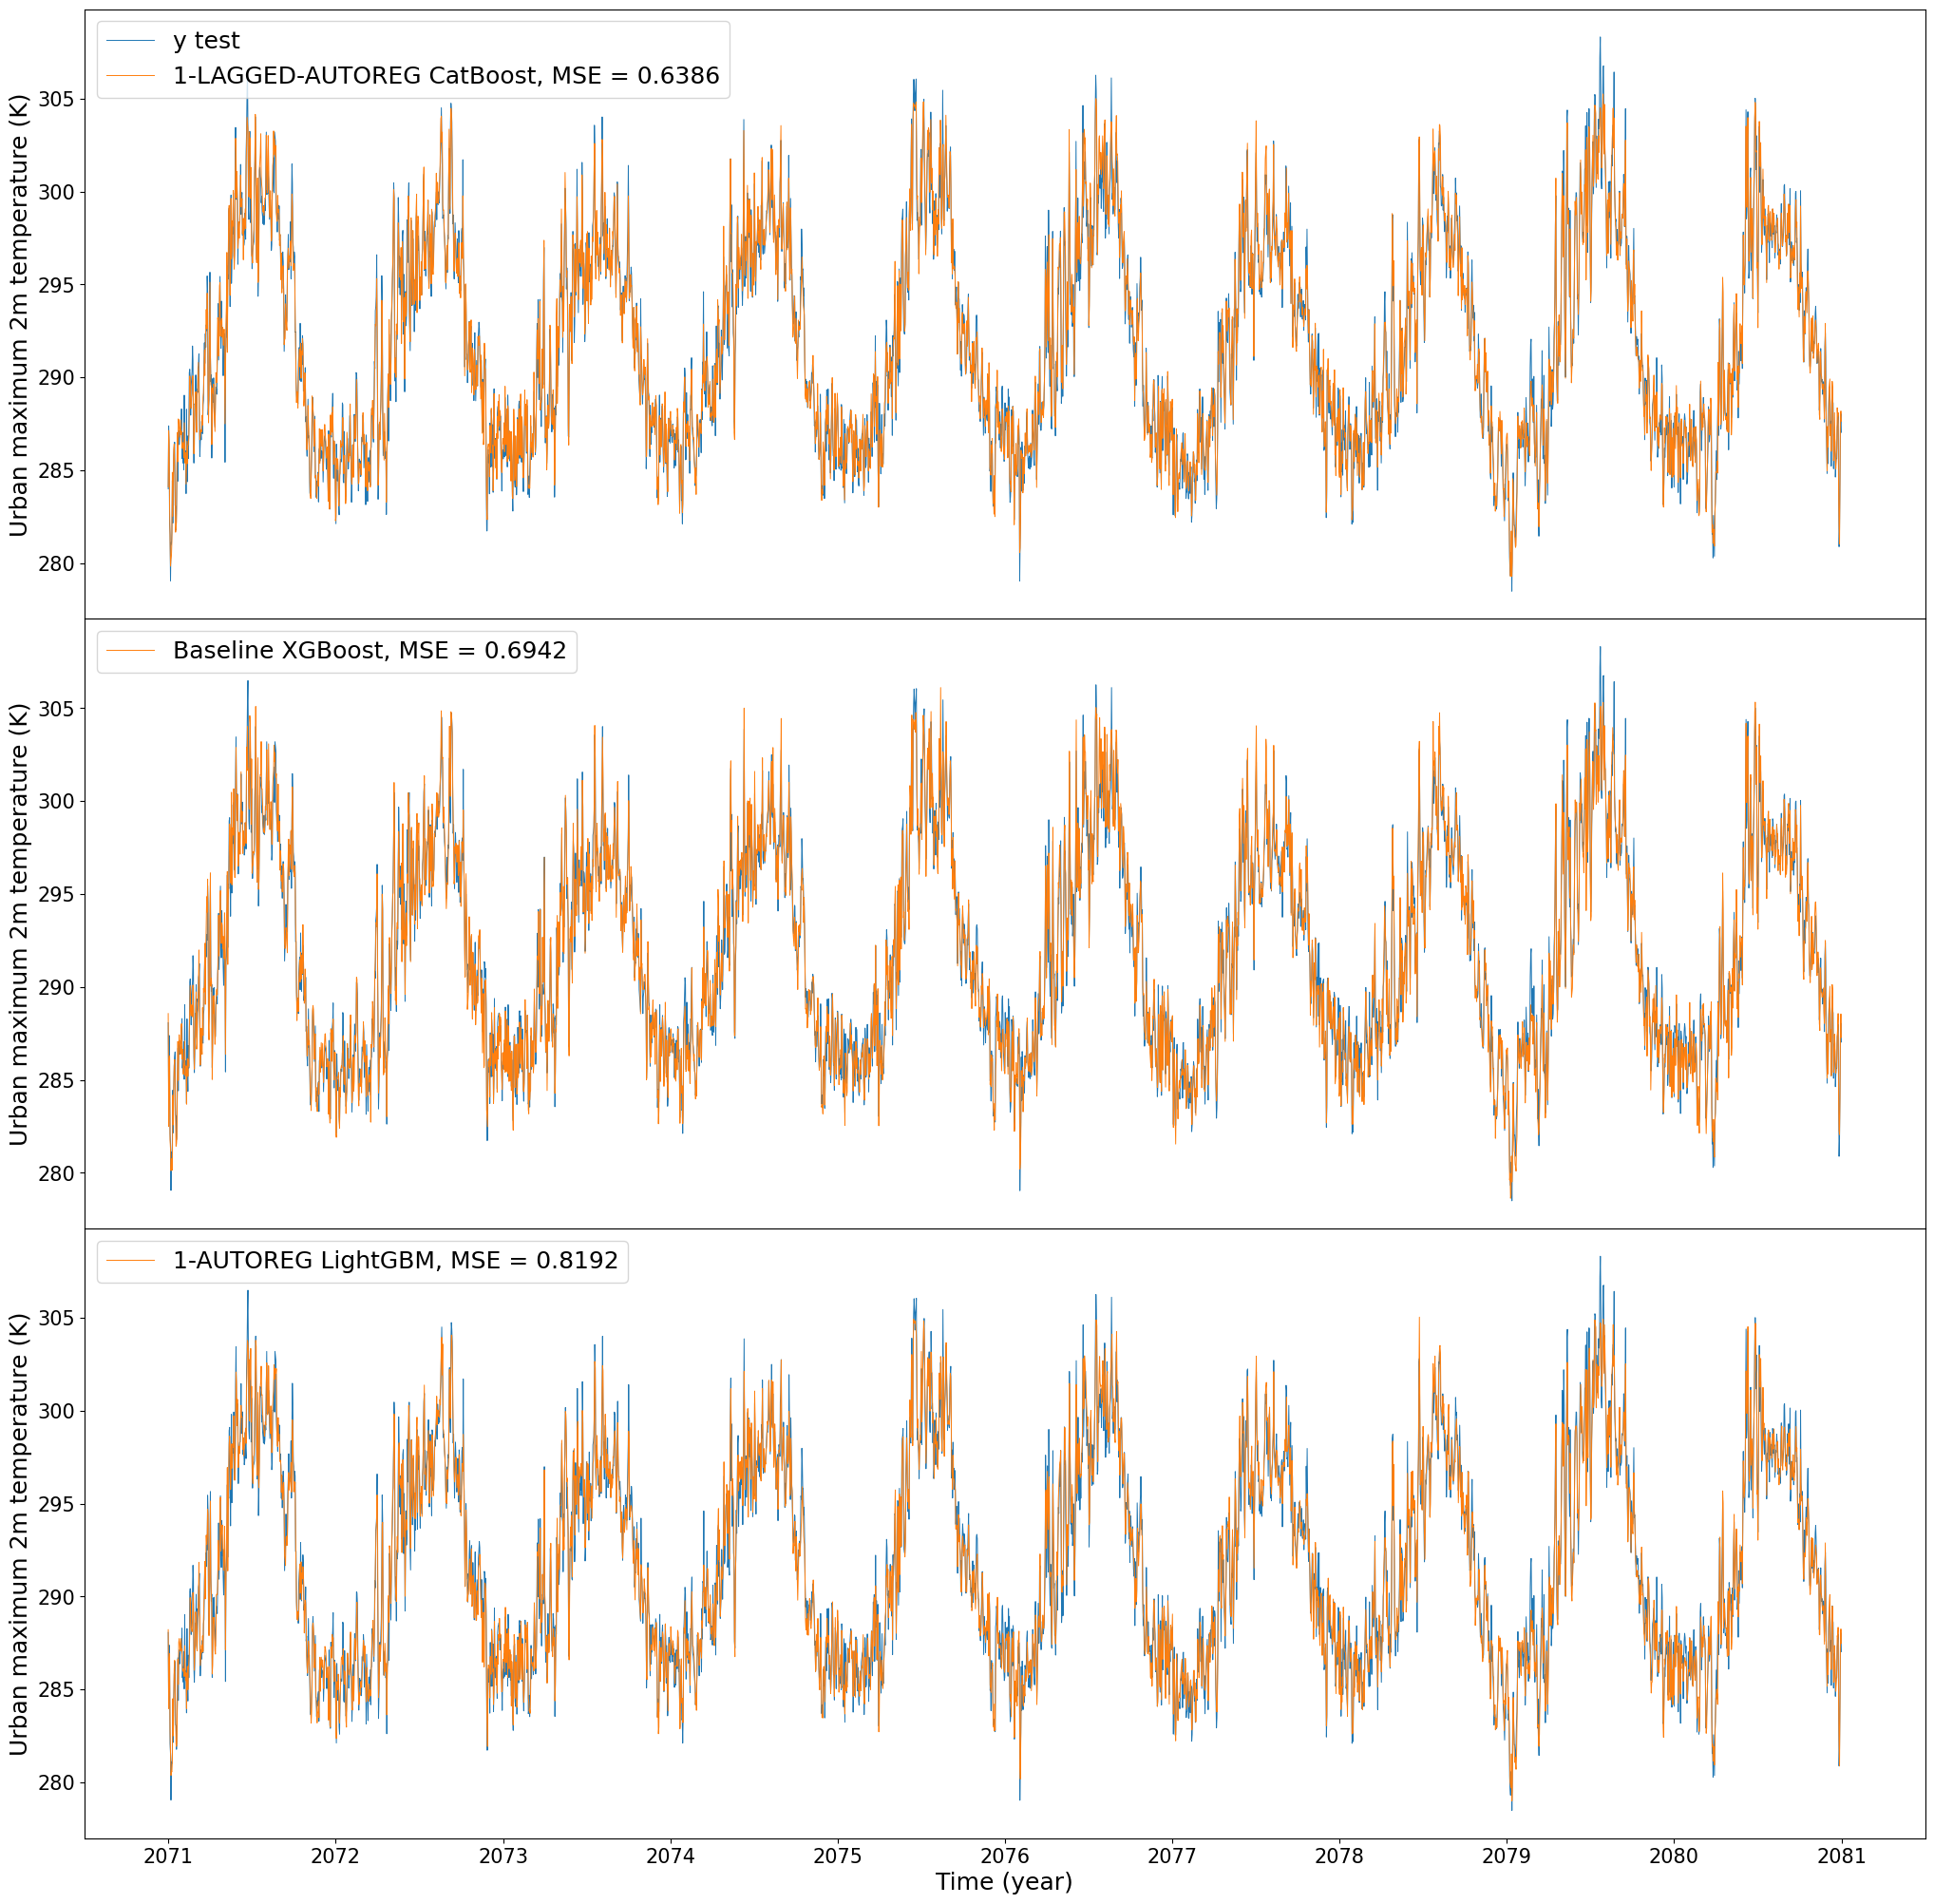

In [33]:
fig, axs = plt.subplots(3,1, figsize=(25, 25),sharey=True)
#axs[0].plot(lagged_autoreg_catboost_london_5, label=['y pred','1-LAGGED-AUTOREG CatBoost, MSE = '])
axs[0].plot(lagged_autoreg_catboost_london_5['y test'], lw=0.7, label='y test')
axs[0].plot(lagged_autoreg_catboost_london_5['1-LAGGED-AUTOREG CatBoost'], lw=0.7, label = '1-LAGGED-AUTOREG CatBoost, MSE = 0.6386')
axs[0].legend(loc="upper left", fontsize=18)
axs[0].set_ylabel("Urban maximum 2m temperature (K)",fontsize=18)
#axs[0].set_yticklabels(fontsize=15)
#axs[1].plot(baseline_xgboost_london_5)
axs[1].plot(baseline_xgboost_london_5['y test'], lw=0.7)
axs[1].plot(baseline_xgboost_london_5['Baseline XGBoost'], lw=0.7, label='Baseline XGBoost, MSE = 0.6942')
axs[1].legend(loc="upper left", fontsize=18)
axs[1].set_ylabel("Urban maximum 2m temperature (K)",fontsize=18)
#axs[1].set_yticklabels(fontsize=15)

axs[2].plot(lagged_autoreg_lgbm_london_5['y test'], lw=0.7)
axs[2].plot(lagged_autoreg_lgbm_london_5['1-AUTOREG LightGBM'], lw=0.7, label='1-AUTOREG LightGBM, MSE = 0.8192')
axs[2].legend(loc="upper left", fontsize=18)
axs[2].set_xlabel('Time (year)',fontsize=18)
axs[2].set_ylabel("Urban maximum 2m temperature (K)",fontsize=18)
#axs[2].set_yticklabels(fontsize=15)
#axs[2].set_xticklabels(fontsize=15)
plt.rcParams.update({'font.size': 15})
#axs[2].get_xticklabels().set_fontsize(15)

##Reduce space in-between subplots
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('Comparison of ensemble performance (ensemble 5).png', bbox_inches = 'tight')

Weekly-averages

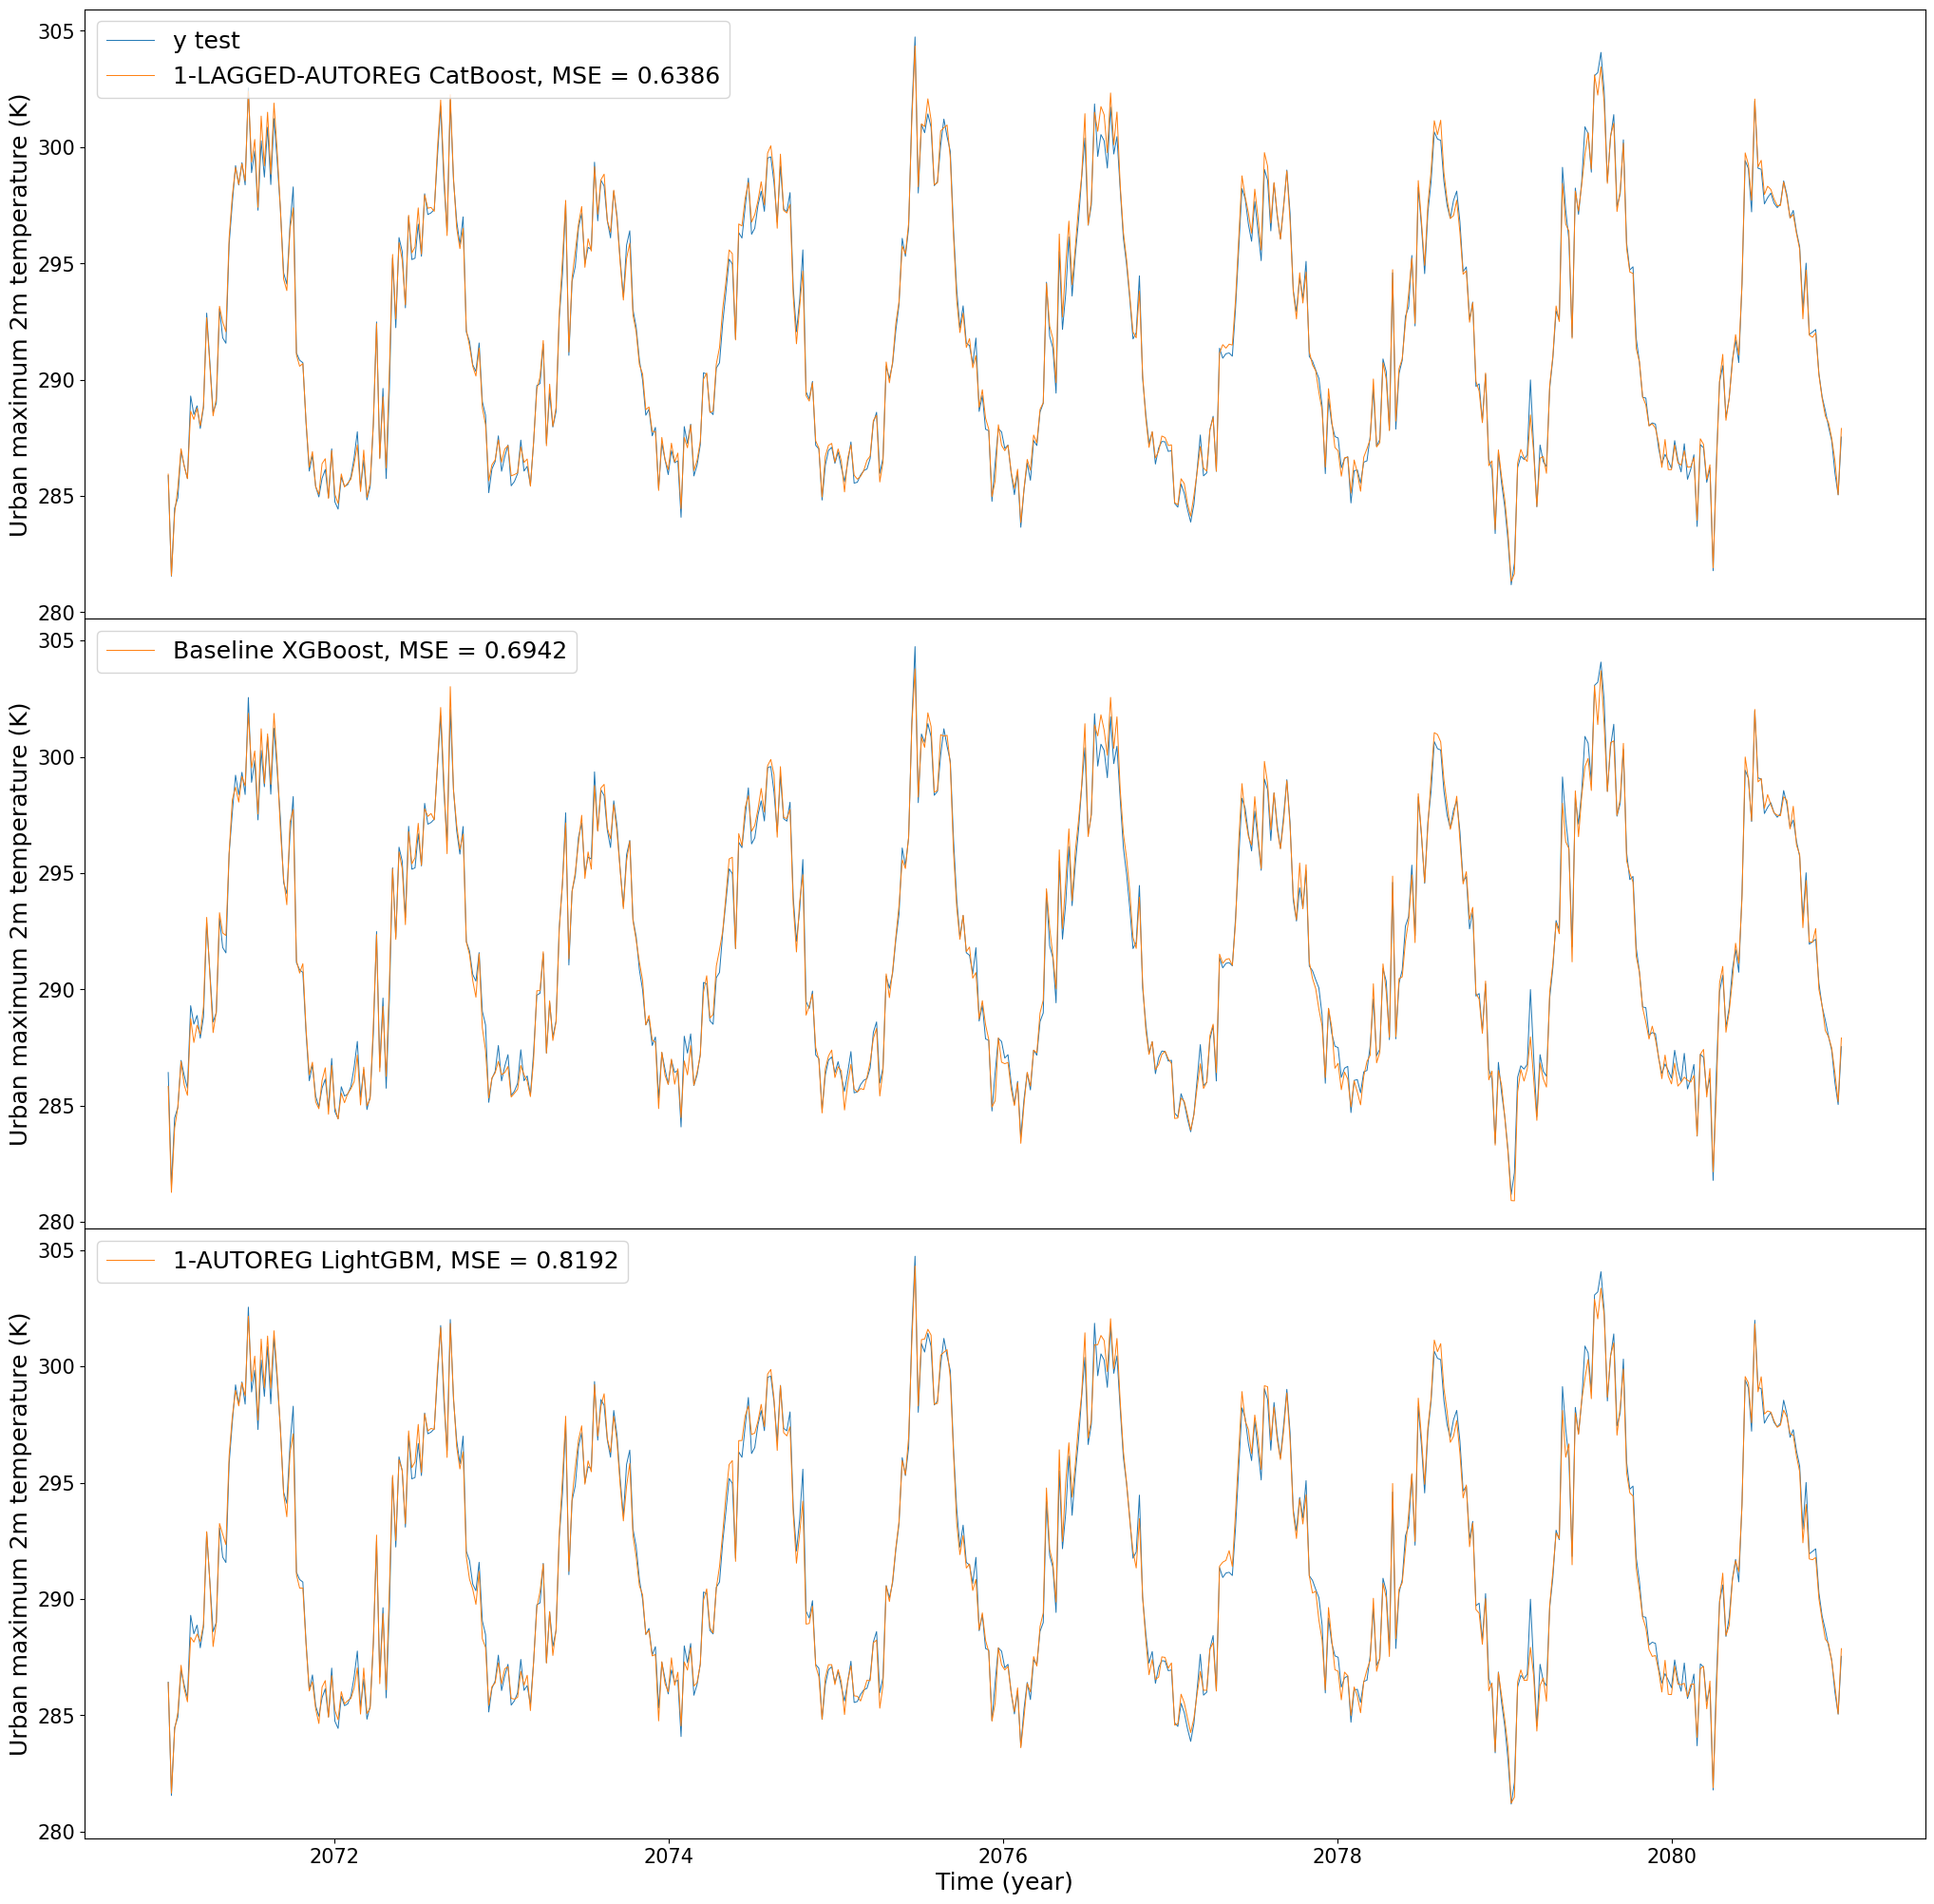

In [34]:
fig, axs = plt.subplots(4,1, figsize=(25, 25),sharey=True)

##Calculating weekly-averages
lagged_autoreg_catboost_london_5_weekly_mean = lagged_autoreg_catboost_london_5.groupby(pd.Grouper(freq="W"))[['y test','1-LAGGED-AUTOREG CatBoost']].mean()
baseline_xgboost_london_5_weekly_mean = baseline_xgboost_london_5.groupby(pd.Grouper(freq="W"))[['y test','Baseline XGBoost']].mean()
lagged_autoreg_lgbm_london_5_weekly_mean = lagged_autoreg_lgbm_london_5.groupby(pd.Grouper(freq="W"))[['y test','1-AUTOREG LightGBM']].mean()

#axs[0].plot(lagged_autoreg_catboost_london_5, label=['y pred','1-LAGGED-AUTOREG CatBoost, MSE = '])
axs[0].plot(lagged_autoreg_catboost_london_5_weekly_mean['y test'], lw=0.7, label='y test')
axs[0].plot(lagged_autoreg_catboost_london_5_weekly_mean['1-LAGGED-AUTOREG CatBoost'], lw=0.7, label = '1-LAGGED-AUTOREG CatBoost, MSE = 0.6386')
axs[0].legend(loc="upper left", fontsize=18)
axs[0].set_ylabel("Urban maximum 2m temperature (K)",fontsize=18)
#axs[0].set_yticklabels(fontsize=15)
#axs[1].plot(baseline_xgboost_london_5)
axs[1].plot(baseline_xgboost_london_5_weekly_mean['y test'], lw=0.7)
axs[1].plot(baseline_xgboost_london_5_weekly_mean['Baseline XGBoost'], lw=0.7, label='Baseline XGBoost, MSE = 0.6942')
axs[1].legend(loc="upper left", fontsize=18)
axs[1].set_ylabel("Urban maximum 2m temperature (K)",fontsize=18)
#axs[1].set_yticklabels(fontsize=15)

axs[2].plot(lagged_autoreg_lgbm_london_5_weekly_mean['y test'], lw=0.7)
axs[2].plot(lagged_autoreg_lgbm_london_5_weekly_mean['1-AUTOREG LightGBM'], lw=0.7, label='1-AUTOREG LightGBM, MSE = 0.8192')
axs[2].legend(loc="upper left", fontsize=18)
axs[2].set_xlabel('Time (year)',fontsize=18)
axs[2].set_ylabel("Urban maximum 2m temperature (K)",fontsize=18)
#axs[2].set_yticklabels(fontsize=15)
#axs[2].set_xticklabels(fontsize=15)
plt.rcParams.update({'font.size': 15})
#axs[2].get_xticklabels().set_fontsize(15)   ##Run 1st with this line, run 2nd time without to obtain final plot

##Reduce space in-between subplots
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('Comparison of ensemble performance weekly mean (ensemble 5).png', bbox_inches = 'tight')

# EXTRAS

## Linear Regression

### Load in y_pred(s)

#### Basline Linear Regression

In [35]:
baseline_linear = pd.read_csv('y_pred_reg_linear.csv', index_col=0)
##Convert 'time' to datetime
baseline_linear['time'] = pd.to_datetime(baseline_linear['time'])
#display(baseline_linear)

#### 5-LAGGED-AUTOREG Linear Regression

In [36]:
lagged_autoreg_linear_5 = pd.read_csv('y_pred_5-lagged-autoreg_linear.csv', index_col=0)
##Convert 'time' to datetime
lagged_autoreg_linear_5['time'] = pd.to_datetime(lagged_autoreg_linear_5['time'])
#display(lagged_autoreg_linear)

In [64]:
##Group Baseline Linear predictions by ensemble member and calculate MSE
baseline_linear_ensemble = analysis_member(baseline_linear)
##Group 5-LAGGED-AUTOREG Linear predictions by ensemble member and calculate MSE
lagged_autoreg_linear_5_ensemble = analysis_member(lagged_autoreg_linear_5)

##Calculating biggest improvements in MSE score from Baseline to 5-LAGGED-AUTOREG
##Concatenate together the tables reporting MSE per ensemble member
baseline_vs_lagged_autoreg_5 = pd.concat([baseline_linear_ensemble,lagged_autoreg_linear_5_ensemble],axis=1)
## Renaming column as ensemble member number
baseline_vs_lagged_autoreg_5.columns.values[0] = "Baseline"
baseline_vs_lagged_autoreg_5.columns.values[1] = "5-LAGGED-AUTOREG"
##Calculate the difference between the two columns
baseline_vs_lagged_autoreg_5['Difference'] = baseline_vs_lagged_autoreg_5['Baseline'] - baseline_vs_lagged_autoreg_5['5-LAGGED-AUTOREG']
##Viewing in term s of worse overall prediction of MSE member by 1-AUTOREG LightGBM
print("MSE per ensemble member ordered by overall worse-predicted members:")
display(baseline_vs_lagged_autoreg_5.sort_values(by='5-LAGGED-AUTOREG',ascending=False))
##Viewing in terms of which ensemble member prediction improved the most
print("MSE per ensemble member ordered by most improved relative to Baseline:")
display(baseline_vs_lagged_autoreg_5.sort_values(by='Difference',ascending=False))

##Save to table for report
baseline_vs_lagged_autoreg_5.to_csv('Baseline Linear vs 5-LAGGED-AUTOREG Linear emulator MSE comparison.csv')

MSE per ensemble member ordered by overall worse-predicted members:


Baseline  5-LAGGED-AUTOREG  Difference
Ensemble number                                        
28               2.052966          0.976076    1.076891
16               2.121232          0.973979    1.147253
7                2.039750          0.939027    1.100723
14               2.018793          0.934449    1.084344
10               2.091347          0.928060    1.163287
24               2.101777          0.925438    1.176340
8                2.006352          0.924855    1.081497
29               2.076140          0.922921    1.153219
15               2.061923          0.920469    1.141454
3                2.032618          0.919090    1.113529
6                2.048947          0.919010    1.129937
32               2.113095          0.917276    1.195819
17               2.052044          0.915961    1.136082
19               2.105321          0.915432    1.189888
26               2.006090          0.914276    1.091814
23               2.006482          0.913650    1.092833
22               2.020732          0.912097    1.108635
4                2.078874          0.905677    1.173197
21               2.044185          0.905600    1.138585
12               2.000005          0.897986    1.102019
9                2.094776          0.896615    1.198161
25               2.014558          0.896174    1.118384
18               1.960892          0.891865    1.069027
13               1.937763          0.890117    1.047646
27               1.969411          0.888588    1.080824
20               1.970796          0.886446    1.084350
11               2.047713          0.886162    1.161552
33               1.999704          0.884094    1.115610
31               2.032638          0.880340    1.152298
30               1.979028          0.878663    1.100365
5                1.912551          0.869935    1.042616

MSE per ensemble member ordered by most improved relative to Baseline:


Baseline  5-LAGGED-AUTOREG  Difference
Ensemble number                                        
9                2.094776          0.896615    1.198161
32               2.113095          0.917276    1.195819
19               2.105321          0.915432    1.189888
24               2.101777          0.925438    1.176340
4                2.078874          0.905677    1.173197
10               2.091347          0.928060    1.163287
11               2.047713          0.886162    1.161552
29               2.076140          0.922921    1.153219
31               2.032638          0.880340    1.152298
16               2.121232          0.973979    1.147253
15               2.061923          0.920469    1.141454
21               2.044185          0.905600    1.138585
17               2.052044          0.915961    1.136082
6                2.048947          0.919010    1.129937
25               2.014558          0.896174    1.118384
33               1.999704          0.884094    1.115610
3                2.032618          0.919090    1.113529
22               2.020732          0.912097    1.108635
12               2.000005          0.897986    1.102019
7                2.039750          0.939027    1.100723
30               1.979028          0.878663    1.100365
23               2.006482          0.913650    1.092833
26               2.006090          0.914276    1.091814
20               1.970796          0.886446    1.084350
14               2.018793          0.934449    1.084344
8                2.006352          0.924855    1.081497
27               1.969411          0.888588    1.080824
28               2.052966          0.976076    1.076891
18               1.960892          0.891865    1.069027
13               1.937763          0.890117    1.047646
5                1.912551          0.869935    1.042616

With Linear Regression, member 32 is just the 2nd-most improved - but we will still plot this member for comparability.

### Comparing Baseline to improved temporal model

In [38]:
##Baseline LightGBM vs 1-AUTOREG LightGBM

##Grabbing London dates of Baseline Linear 
baseline_linear_london = baseline_linear.loc[(baseline_linear['lat']>51)&(baseline_linear['lat']<52)&(baseline_linear['lon']==0)]
##Grabbing London dates of 5-LAGGED-AUTOREG Linear
lagged_autoreg_linear_5_london = lagged_autoreg_linear_5.loc[(lagged_autoreg_linear_5['lat']>51)&(lagged_autoreg_linear_5['lat']<52)&(lagged_autoreg_linear_5['lon']==0)]
##Grabbing 'most improved' ensemble member 32 from both
baseline_linear_london_32 = baseline_linear_london.loc[baseline_linear_london['Ensemble_num']==32]
lagged_autoreg_linear_5_london_32 = lagged_autoreg_linear_5_london.loc[lagged_autoreg_linear_5_london['Ensemble_num']==32]
##Set time index
baseline_linear_london_32 = baseline_linear_london_32.set_index('time')
lagged_autoreg_linear_5_london_32 = lagged_autoreg_linear_5_london_32.set_index('time')
##Remove unecessary columns
baseline_linear_london_32 = baseline_linear_london_32.drop(columns=['lat','lon','Ensemble_num']) ##Keeping 'TREFMXAV_U' (y true) column once
lagged_autoreg_linear_5_london_32 = lagged_autoreg_linear_5_london_32.drop(columns=['lat','lon','Ensemble_num','TREFMXAV_U']) ##Keeping y_pred column once
##Re-naming columns
baseline_linear_london_32 = baseline_linear_london_32.rename(columns={'TREFMXAV_U': 'y test', 'y_pred': 'Baseline Linear'})
lagged_autoreg_linear_5_london_32 = lagged_autoreg_linear_5_london_32.rename(columns={'y_pred': '5-LAGGED-AUTOREG Linear'})

##Concatenate together column-next
baseline_vs_lagged_autoreg_5_ts = pd.concat([baseline_linear_london_32,lagged_autoreg_linear_5_london_32],axis=1).dropna()   ##Must remove rows with NaN (because 1-lag day removes 1 day)

#display(baseline_vs_lagged_autoreg_5_ts)

Daily records

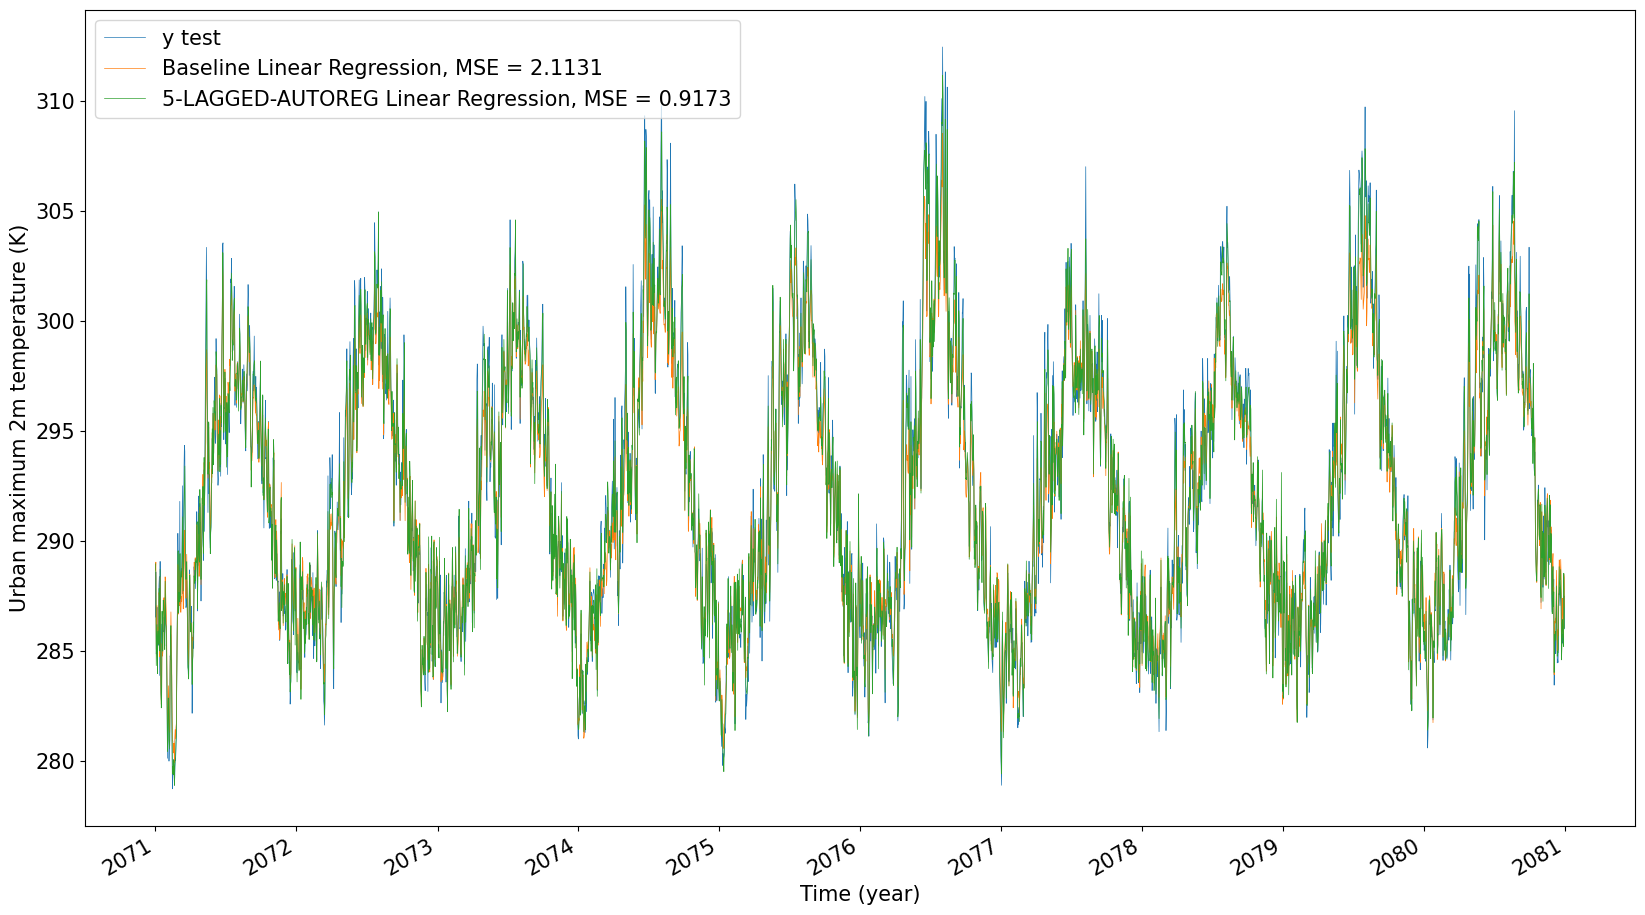

In [39]:
ax = baseline_vs_lagged_autoreg_5_ts.plot(figsize=(20,12),lw=0.5)
ax.legend(['y test', 'Baseline Linear Regression, MSE = 2.1131', '5-LAGGED-AUTOREG Linear Regression, MSE = 0.9173'], loc="upper left")
ax.set_xlabel("Time (year)")
ax.set_ylabel("Urban maximum 2m temperature (K)")
plt.savefig('y true vs baseline vs 5-lagged-autoreg linear daily (ensemble 32).png', bbox_inches = 'tight')

Weekly-averages

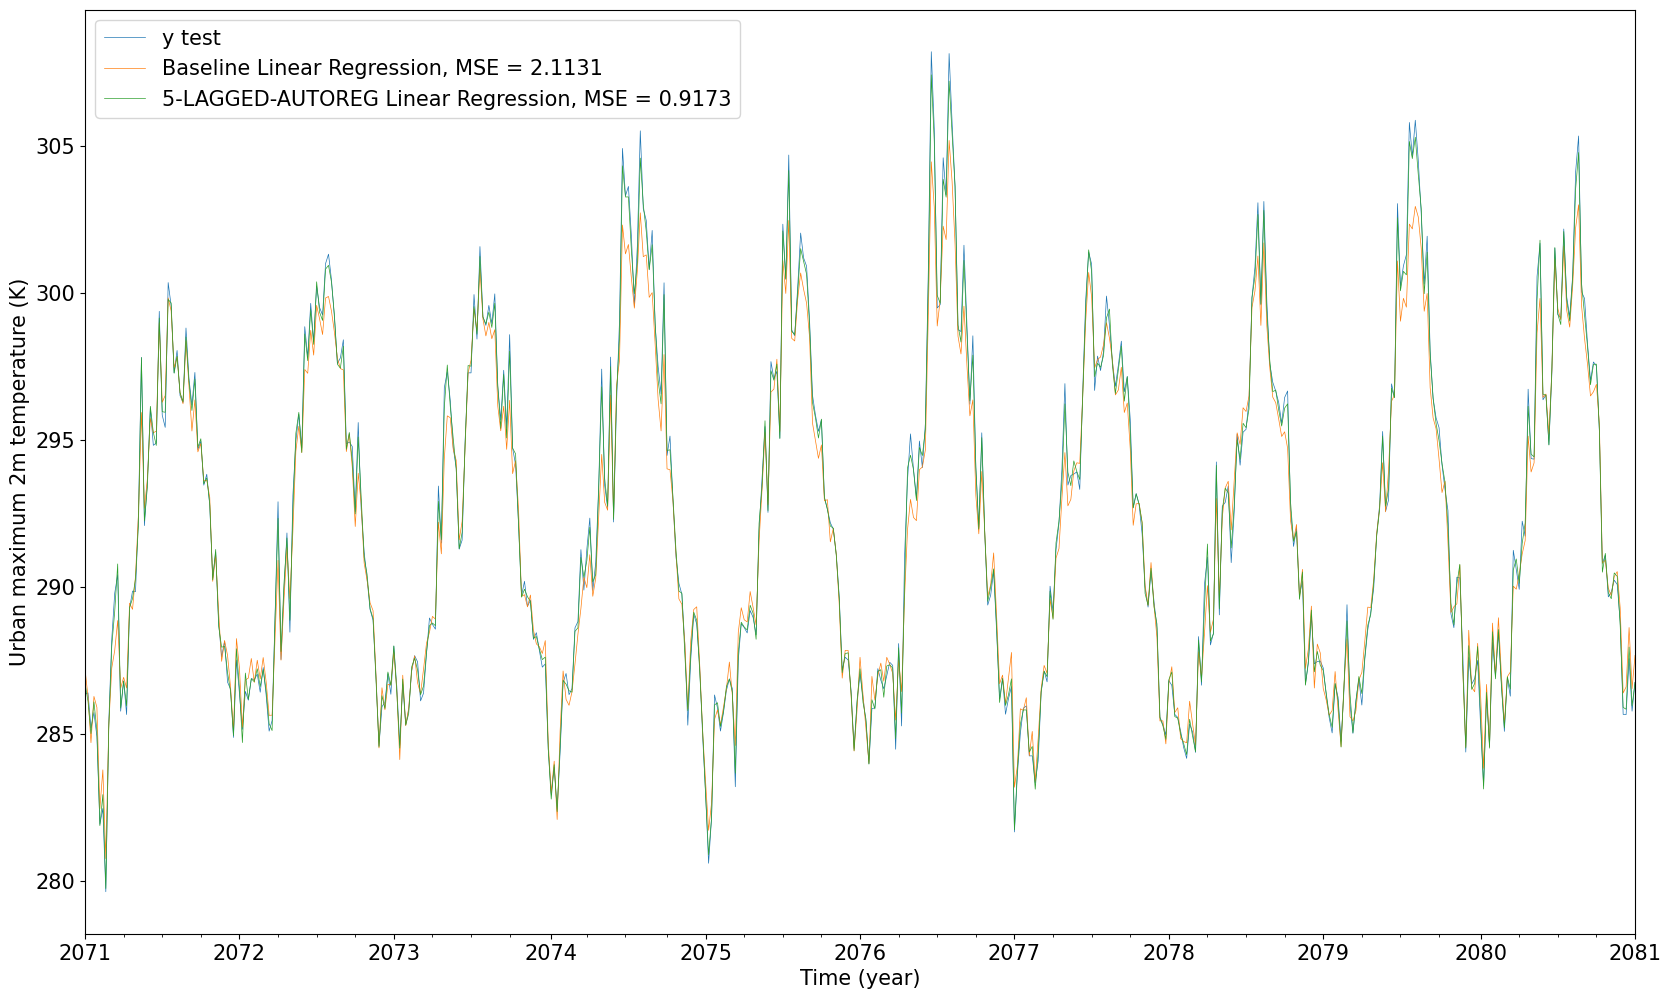

In [40]:
baseline_vs_lagged_autoreg_5_ts_weekly_mean = baseline_vs_lagged_autoreg_5_ts.groupby(pd.Grouper(freq="W"))[['y test','Baseline Linear','5-LAGGED-AUTOREG Linear']].mean()
#display(baseline_vs_lagged_autoreg_5_ts_weekly_mean)

ax = baseline_vs_lagged_autoreg_5_ts_weekly_mean.plot(figsize=(20,12),lw=0.5)
ax.legend(['y test', 'Baseline Linear Regression, MSE = 2.1131', '5-LAGGED-AUTOREG Linear Regression, MSE = 0.9173'], loc="upper left")
ax.set_xlabel("Time (year)")
ax.set_ylabel("Urban maximum 2m temperature (K)")
plt.savefig('y true vs baseline vs 5-lagged-autoreg linear weekly mean (ensemble 32).png', bbox_inches = 'tight')

## Random Forest

### Loading in y_pred(s)

### Baseline Random Forest

In [41]:
baseline_rf= pd.read_csv('y_pred_reg_rf.csv', index_col=0)
##Convert 'time' to datetime
baseline_rf['time'] = pd.to_datetime(baseline_rf['time'])
#display(baseline_rf)

In [42]:
baseline_rf_ensemble = analysis_member(baseline_rf)
display(baseline_rf_ensemble.sort_values(by='MSE', ascending=False))

MSE
Ensemble number          
16               6.875649
32               6.865824
6                6.676773
24               6.630308
9                6.601653
19               6.557188
31               6.542790
29               6.471854
21               6.462875
17               6.384909
22               6.324152
3                6.194012
25               6.129502
7                6.123821
11               6.121721
28               6.076983
23               6.006706
26               5.961948
30               5.881337
33               5.789517
4                5.759588
15               5.751264
10               5.729697
20               5.695661
14               5.634254
8                5.629619
27               5.567136
12               5.533399
18               5.428835
13               5.349800
5                5.171023

#### Visualise "best performance" member 5

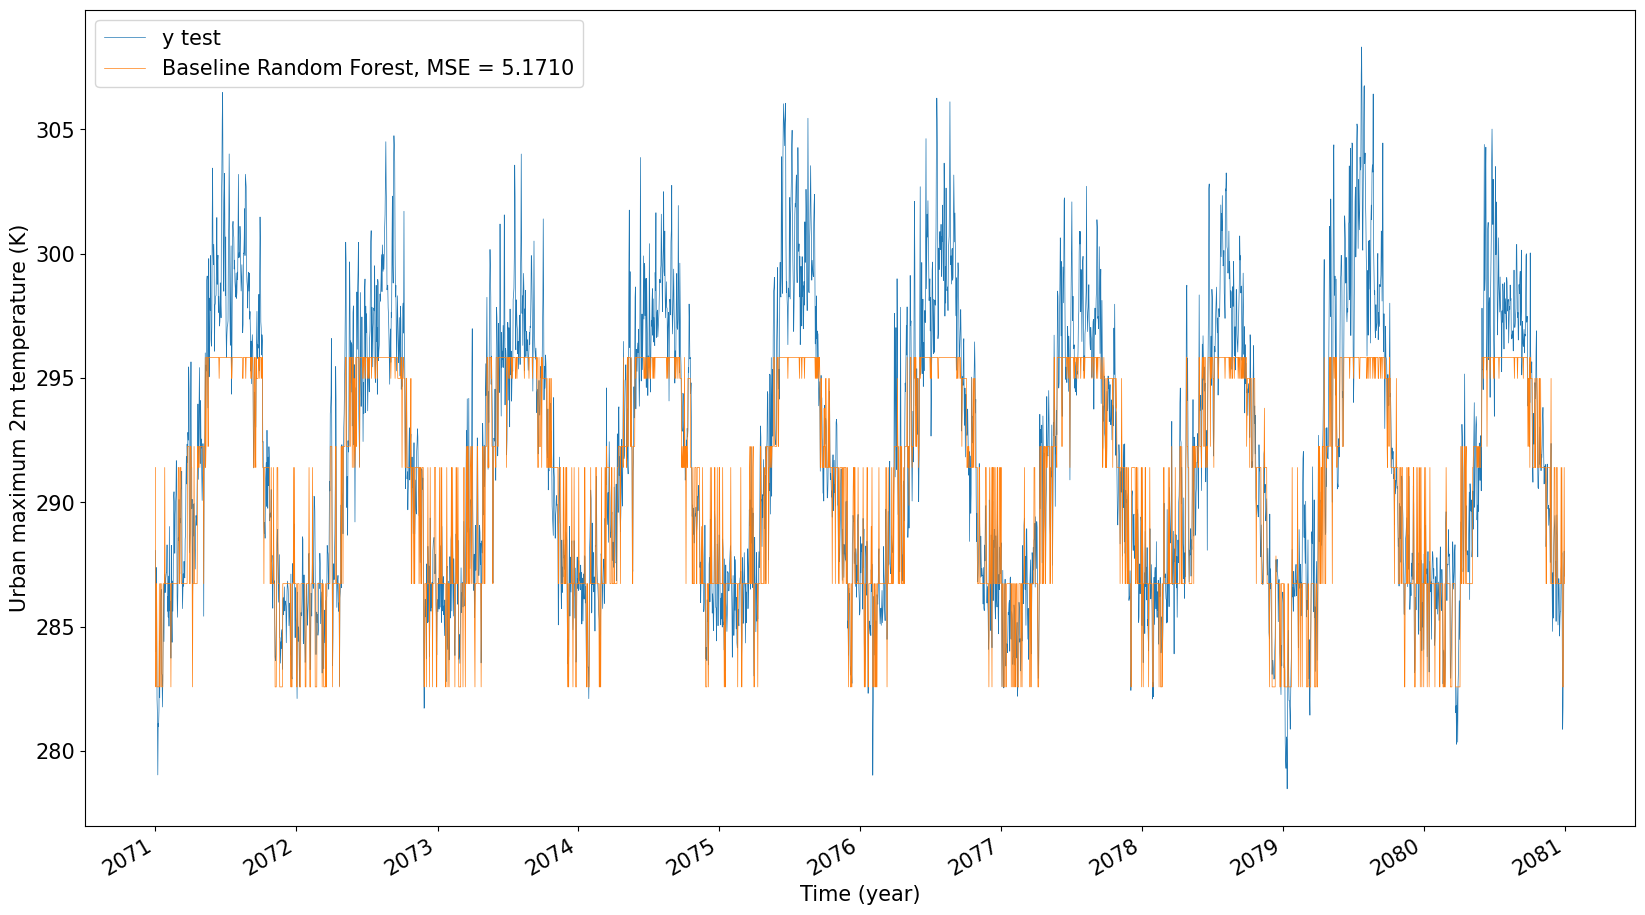

In [63]:
##Grab London dates
baseline_rf_london = baseline_rf.loc[(baseline_rf['lat']>51)&(baseline_rf['lat']<52)&(baseline_rf['lon']==0)]
##Grabbing 'lowest error' member 5
baseline_rf_london_5 = baseline_rf_london.loc[baseline_rf_london['Ensemble_num']==5]
##Set time index
baseline_rf_london_5 = baseline_rf_london_5.set_index('time')
##Remove unecessary columns
baseline_rf_london_5 = baseline_rf_london_5.drop(columns=['lat','lon','Ensemble_num']) ##Keeping 'TREFMXAV_U' (y true) column once
##Re-naming columns
baseline_rf_london_5 = baseline_rf_london_5.rename(columns={'TREFMXAV_U': 'y test', 'y_pred': 'Baseline Random Forest'})

##Plot
ax = baseline_rf_london_5.plot(figsize=(20,12),lw=0.5)
ax.legend(['y test', 'Baseline Random Forest, MSE = 5.1710'], loc="upper left")
ax.set_xlabel("Time (year)")
ax.set_ylabel("Urban maximum 2m temperature (K)")
plt.savefig('y true vs baseline rf (ensemble 5).png', bbox_inches = 'tight')

# By location

## CatBoost (Baseline vs 1-LAGGED-AUTREG)

In [44]:
## Grouping by location and calculating MSE
baseline_catboost_location = analysis_location(baseline_catboost)
lagged_autoreg_catboost_location = analysis_location(lagged_autoreg_catboost)

In [45]:
##Concatenate together the tables reporting MSE per location
baseline_vs_lagged_autoreg_location = pd.concat([baseline_catboost_location,lagged_autoreg_catboost_location],axis=1)
## Renaming column as ensemble member number
baseline_vs_lagged_autoreg_location.columns.values[0] = "Baseline"
baseline_vs_lagged_autoreg_location.columns.values[1] = "1-LAGGED-AUTOREG"
##Calculate the difference between the two columns
baseline_vs_lagged_autoreg_location['Difference'] = baseline_vs_lagged_autoreg_location['Baseline'] - baseline_vs_lagged_autoreg_location['1-LAGGED-AUTOREG']
##Viewing in terms of which location was predicted worst overall
#display(baseline_vs_lagged_autoreg_location.sort_values(by='1-LAGGED-AUTOREG',ascending=False))
#display(baseline_vs_lagged_autoreg_location.sort_values(by='Baseline',ascending=False))
##Viewing in terms of which location prediction improved the most
display(baseline_vs_lagged_autoreg_location.sort_values(by='Difference',ascending=False))
##Save to table for report
baseline_vs_lagged_autoreg_location.to_csv('Baseline_catboost vs 1-LAGGED-AUTOREG CatBoost by location.csv')

Baseline  1-LAGGED-AUTOREG  Difference
lat       lon                                          
51.361256 -2.50  0.902375          0.765786    0.136589
52.303665  0.00  0.975495          0.874771    0.100723
50.418850 -2.50  0.892597          0.792582    0.100015
51.361256  0.00  0.789876          0.699577    0.090299
50.418850  1.25  1.220517          1.147059    0.073458
52.303665 -1.25  0.734909          0.667268    0.067640
53.246075 -2.50  0.633604          0.567511    0.066093
52.303665 -2.50  0.716867          0.651772    0.065096
51.361256 -1.25  0.756448          0.696272    0.060176
53.246075 -1.25  0.740009          0.680064    0.059944
52.303665 -3.75  0.681573          0.629828    0.051745
55.130890 -1.25  1.028504          0.977166    0.051338
49.476440  1.25  1.263149          1.212682    0.050467
53.246075 -3.75  0.649958          0.605601    0.044357
           0.00  0.977202          0.934787    0.042416
55.130890 -2.50  0.769011          0.727307    0.041704
54.188480 -1.25  0.775261          0.734405    0.040856
51.361256 -3.75  0.631317          0.591156    0.040161
54.188480 -5.00  0.747401          0.707673    0.039728
51.361256  1.25  0.878219          0.840672    0.037548
52.303665 -5.00  0.824357          0.787999    0.036358
54.188480 -3.75  0.623787          0.588095    0.035692
          -2.50  0.675909          0.640660    0.035248
49.476440 -1.25  1.044967          1.012065    0.032902
52.303665  1.25  0.794383          0.768166    0.026216
          -6.25  0.663404          0.638332    0.025072
57.015705 -3.75  0.718792          0.694642    0.024150
53.246075 -7.50  0.657998          0.636348    0.021650
55.130890 -3.75  0.639462          0.618595    0.020868
56.073299 -3.75  0.616282          0.600904    0.015379
49.476440  0.00  1.045215          1.032469    0.012746
50.418850 -3.75  0.584648          0.577180    0.007468
52.303665 -7.50  0.549158          0.544132    0.005026
50.418850 -5.00  0.483805          0.479356    0.004448
54.188480 -6.25  0.637626          0.635120    0.002506
57.958115 -2.50  0.699448          0.697130    0.002318
          -6.25  0.535889          0.535386    0.000502
56.073299 -2.50  0.643685          0.646030   -0.002345
57.015705 -2.50  0.588249          0.593552   -0.005304
54.188480 -7.50  0.618941          0.630762   -0.011821
53.246075 -6.25  0.515753          0.527599   -0.011846
55.130890 -5.00  0.615871          0.630056   -0.014185
54.188480  0.00  0.941513          0.956172   -0.014659
57.958115 -3.75  0.694842          0.710088   -0.015246
57.015705 -1.25  0.654124          0.670700   -0.016576
53.246075 -5.00  0.541676          0.562886   -0.021210
56.073299 -5.00  0.503223          0.524587   -0.021364
55.130890 -6.25  0.585662          0.607282   -0.021620
53.246075  1.25  0.827287          0.849820   -0.022533
57.958115 -1.25  0.536405          0.567363   -0.030957
55.130890 -7.50  0.596524          0.628465   -0.031941
58.900524 -3.75  0.497637          0.534131   -0.036495

C:\Users\laure\AppData\Local\Temp\ipykernel_20012\3417876159.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = plt.cm.get_cmap('RdYlGn_r')
C:\Users\laure\AppData\Local\Temp\ipykernel_20012\3417876159.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = plt.cm.get_cmap('RdYlGn_r')


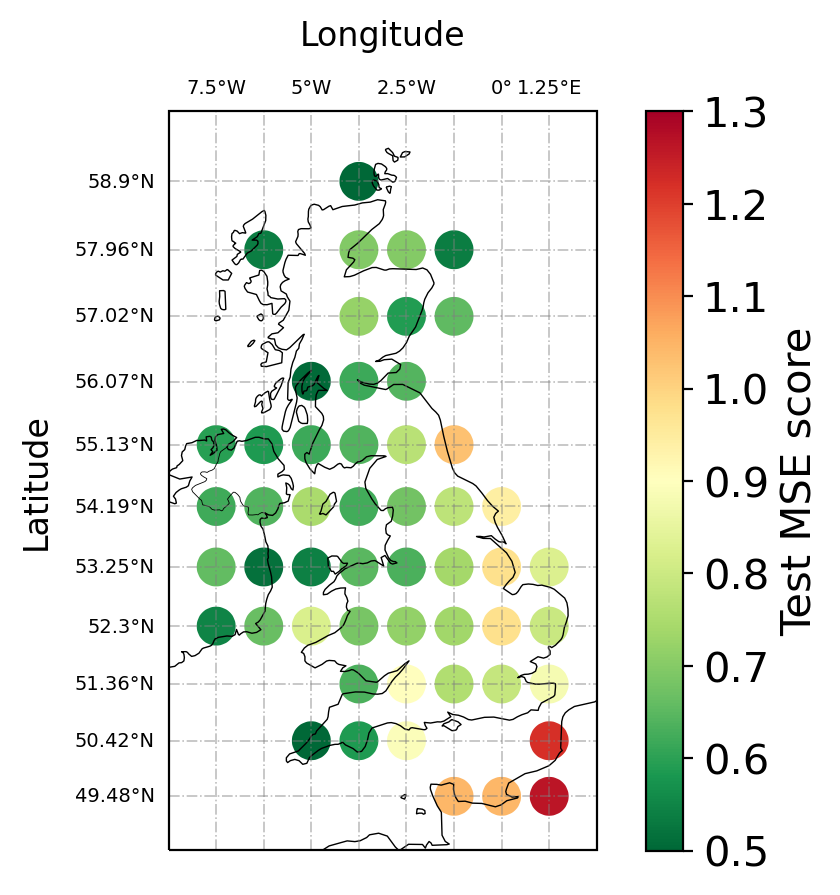

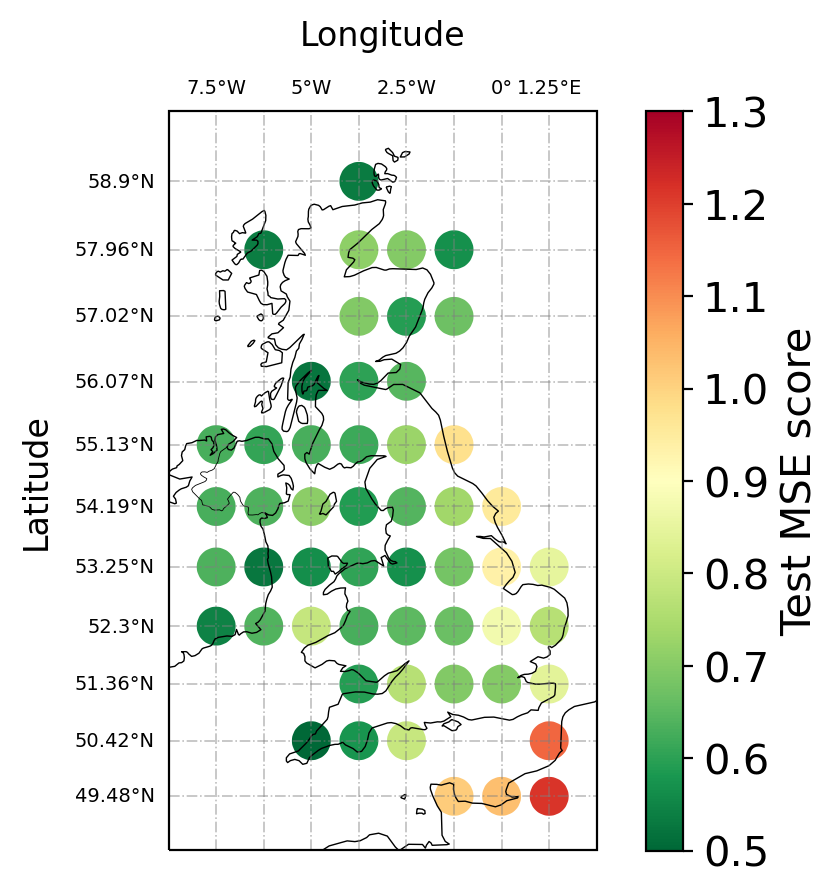

In [46]:
plot_spatial_mse1(baseline_catboost_location.reset_index())
plt.savefig('Baseline_catboost spatial analysis map (shared axis to xgboost).png', bbox_inches = 'tight')
plot_spatial_mse1(lagged_autoreg_catboost_location.reset_index())
plt.savefig('1-LAGGED-AUTOREG_catboost spatial analysis map (shared axis to xgboost).png', bbox_inches = 'tight')

## LightGBM (Baseline vs 1-AUTOREG)

In [47]:
## Grouping by location and calculating MSE
baseline_lgbm_location = analysis_location(baseline_lgbm)
autoreg_lgbm_location = analysis_location(autoreg_lgbm)

##Concatenate together the tables reporting MSE per location
baseline_vs_autoreg_location = pd.concat([baseline_lgbm_location,autoreg_lgbm_location],axis=1)
## Renaming column as ensemble member number
baseline_vs_autoreg_location.columns.values[0] = "Baseline"
baseline_vs_autoreg_location.columns.values[1] = "1-AUTOREG"
##Calculate the difference between the two columns
baseline_vs_autoreg_location['Difference'] = baseline_vs_autoreg_location['Baseline'] - baseline_vs_autoreg_location['1-AUTOREG']
##Viewing in terms of which location was predicted worst
display(baseline_vs_autoreg_location.sort_values(by='1-AUTOREG',ascending=False))
##Viewing in terms of which location prediction improved the most
display(baseline_vs_autoreg_location.sort_values(by='Difference',ascending=False))
##Save to table for report
baseline_vs_autoreg_location.to_csv('Baseline LightGBM vs 1-AUTOREG LightGBM by location.csv')

Baseline  1-AUTOREG  Difference
lat       lon                                   
49.476440  1.25  1.868614   1.678439    0.190175
50.418850  1.25  1.495030   1.358325    0.136705
49.476440  0.00  1.306055   1.246924    0.059131
          -1.25  1.223853   1.172066    0.051787
55.130890 -1.25  1.149049   1.170914   -0.021865
54.188480  0.00  1.253181   1.145841    0.107340
52.303665  0.00  1.255318   1.138407    0.116912
53.246075  1.25  1.133459   1.087971    0.045488
           0.00  1.044498   1.065614   -0.021116
51.361256  1.25  1.054936   1.024101    0.030835
54.188480 -5.00  1.085375   1.021974    0.063401
50.418850 -2.50  1.149742   0.977234    0.172508
52.303665 -5.00  1.301048   0.973626    0.327421
           1.25  0.896079   0.972494   -0.076415
          -1.25  1.020406   0.946247    0.074159
51.361256 -2.50  1.027881   0.927073    0.100808
54.188480 -1.25  0.859942   0.918954   -0.059012
51.361256 -1.25  0.984017   0.901803    0.082215
55.130890 -2.50  0.876988   0.879800   -0.002812
57.958115 -3.75  0.895990   0.878802    0.017188
          -2.50  0.812610   0.872684   -0.060074
52.303665 -2.50  0.907991   0.868366    0.039625
51.361256  0.00  0.884421   0.867474    0.016947
53.246075 -1.25  0.852843   0.866663   -0.013820
57.015705 -3.75  0.873488   0.860199    0.013289
54.188480 -6.25  0.822190   0.836282   -0.014092
          -7.50  0.804120   0.833621   -0.029501
53.246075 -7.50  0.860291   0.832868    0.027423
55.130890 -5.00  0.802704   0.831751   -0.029047
54.188480 -2.50  0.841252   0.818469    0.022783
53.246075 -3.75  0.816603   0.796923    0.019680
52.303665 -3.75  0.831934   0.793433    0.038502
54.188480 -3.75  0.786997   0.791979   -0.004982
55.130890 -3.75  0.765407   0.782823   -0.017416
52.303665 -6.25  0.757672   0.780120   -0.022448
56.073299 -2.50  0.719312   0.774843   -0.055531
57.015705 -1.25  0.795953   0.770596    0.025356
          -2.50  0.688533   0.757427   -0.068894
56.073299 -3.75  0.738346   0.753411   -0.015065
55.130890 -7.50  0.712624   0.751748   -0.039124
          -6.25  0.657789   0.723514   -0.065725
51.361256 -3.75  0.724929   0.720537    0.004392
50.418850 -3.75  0.691361   0.709317   -0.017957
53.246075 -2.50  0.689223   0.707130   -0.017907
52.303665 -7.50  0.633285   0.687253   -0.053968
53.246075 -6.25  0.622289   0.684256   -0.061966
          -5.00  0.642524   0.683471   -0.040947
56.073299 -5.00  0.602162   0.672422   -0.070261
58.900524 -3.75  0.679897   0.665347    0.014549
57.958115 -6.25  0.622697   0.644850   -0.022153
          -1.25  0.660724   0.632541    0.028183
50.418850 -5.00  0.585584   0.623840   -0.038256

Baseline  1-AUTOREG  Difference
lat       lon                                   
52.303665 -5.00  1.301048   0.973626    0.327421
49.476440  1.25  1.868614   1.678439    0.190175
50.418850 -2.50  1.149742   0.977234    0.172508
           1.25  1.495030   1.358325    0.136705
52.303665  0.00  1.255318   1.138407    0.116912
54.188480  0.00  1.253181   1.145841    0.107340
51.361256 -2.50  1.027881   0.927073    0.100808
          -1.25  0.984017   0.901803    0.082215
52.303665 -1.25  1.020406   0.946247    0.074159
54.188480 -5.00  1.085375   1.021974    0.063401
49.476440  0.00  1.306055   1.246924    0.059131
          -1.25  1.223853   1.172066    0.051787
53.246075  1.25  1.133459   1.087971    0.045488
52.303665 -2.50  0.907991   0.868366    0.039625
          -3.75  0.831934   0.793433    0.038502
51.361256  1.25  1.054936   1.024101    0.030835
57.958115 -1.25  0.660724   0.632541    0.028183
53.246075 -7.50  0.860291   0.832868    0.027423
57.015705 -1.25  0.795953   0.770596    0.025356
54.188480 -2.50  0.841252   0.818469    0.022783
53.246075 -3.75  0.816603   0.796923    0.019680
57.958115 -3.75  0.895990   0.878802    0.017188
51.361256  0.00  0.884421   0.867474    0.016947
58.900524 -3.75  0.679897   0.665347    0.014549
57.015705 -3.75  0.873488   0.860199    0.013289
51.361256 -3.75  0.724929   0.720537    0.004392
55.130890 -2.50  0.876988   0.879800   -0.002812
54.188480 -3.75  0.786997   0.791979   -0.004982
53.246075 -1.25  0.852843   0.866663   -0.013820
54.188480 -6.25  0.822190   0.836282   -0.014092
56.073299 -3.75  0.738346   0.753411   -0.015065
55.130890 -3.75  0.765407   0.782823   -0.017416
53.246075 -2.50  0.689223   0.707130   -0.017907
50.418850 -3.75  0.691361   0.709317   -0.017957
53.246075  0.00  1.044498   1.065614   -0.021116
55.130890 -1.25  1.149049   1.170914   -0.021865
57.958115 -6.25  0.622697   0.644850   -0.022153
52.303665 -6.25  0.757672   0.780120   -0.022448
55.130890 -5.00  0.802704   0.831751   -0.029047
54.188480 -7.50  0.804120   0.833621   -0.029501
50.418850 -5.00  0.585584   0.623840   -0.038256
55.130890 -7.50  0.712624   0.751748   -0.039124
53.246075 -5.00  0.642524   0.683471   -0.040947
52.303665 -7.50  0.633285   0.687253   -0.053968
56.073299 -2.50  0.719312   0.774843   -0.055531
54.188480 -1.25  0.859942   0.918954   -0.059012
57.958115 -2.50  0.812610   0.872684   -0.060074
53.246075 -6.25  0.622289   0.684256   -0.061966
55.130890 -6.25  0.657789   0.723514   -0.065725
57.015705 -2.50  0.688533   0.757427   -0.068894
56.073299 -5.00  0.602162   0.672422   -0.070261
52.303665  1.25  0.896079   0.972494   -0.076415

C:\Users\laure\AppData\Local\Temp\ipykernel_20012\1535480831.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = plt.cm.get_cmap('RdYlGn_r')
C:\Users\laure\AppData\Local\Temp\ipykernel_20012\1535480831.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = plt.cm.get_cmap('RdYlGn_r')


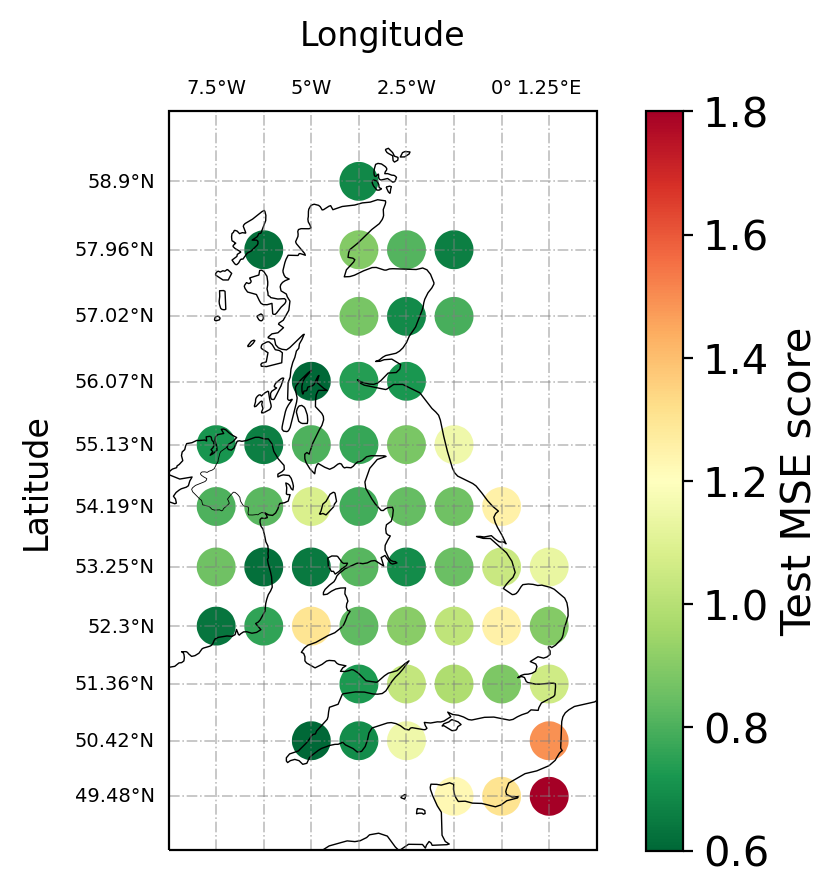

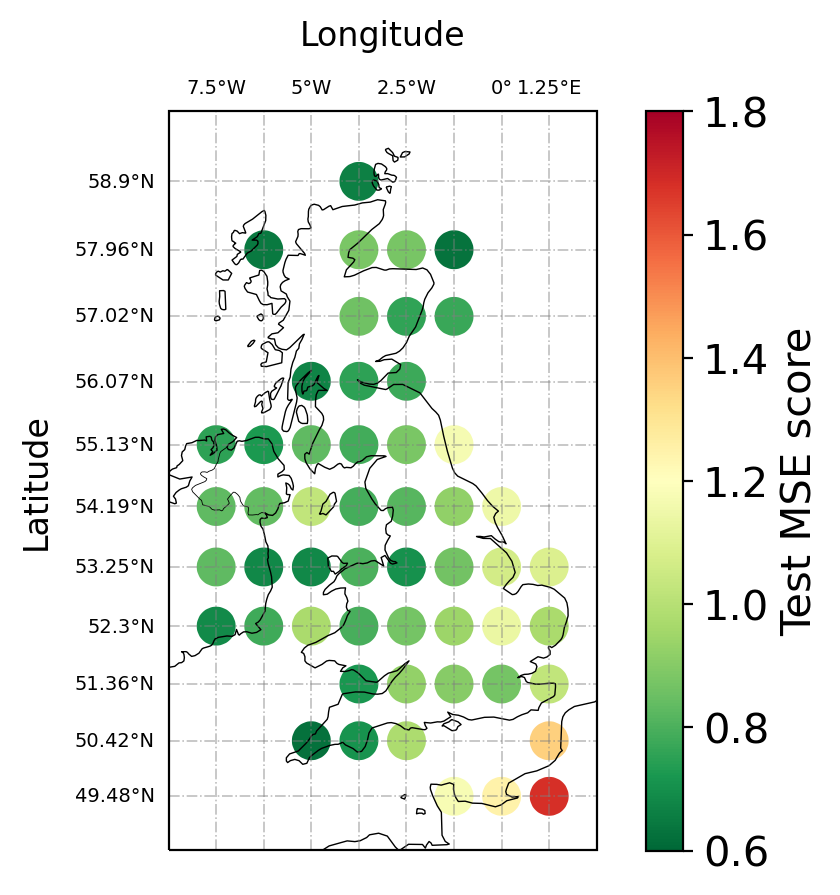

In [48]:
plot_spatial_mse2(baseline_lgbm_location.reset_index())
plt.savefig('Baseline_lgbm spatial analysis map (shared axis to Baseline_lgbm).png', bbox_inches = 'tight')
plot_spatial_mse2(autoreg_lgbm_location.reset_index())
plt.savefig('1-AUTOREG_lgbm spatial analysis map (shared axis to Baseline_lgbm).png', bbox_inches = 'tight')

## XGBoost

### XGBoost Baseline

In [49]:
## Grouping by location and calculating MSE
baseline_xgboost_location = analysis_location(baseline_xgboost)
##No comparison necessary here
baseline_xgboost_solo = baseline_xgboost_location.copy()
## Renaming column as ensemble member number
baseline_xgboost_solo.columns.values[0] = "Baseline"
##Viewing in terms of which ensemble member prediction improved the most
display(baseline_xgboost_solo.sort_values(by='Baseline',ascending=False))
##Save to table for report
baseline_xgboost_solo.to_csv('Baseline_xgboost by location.csv')

Baseline
lat       lon            
49.476440  1.25  1.372801
50.418850  1.25  1.189765
49.476440 -1.25  1.178395
           0.00  1.120952
51.361256  1.25  1.012130
53.246075  0.00  0.983584
55.130890 -1.25  0.942450
54.188480  0.00  0.935227
53.246075  1.25  0.923850
52.303665  1.25  0.880133
           0.00  0.861188
          -5.00  0.835214
51.361256  0.00  0.819887
          -2.50  0.788330
50.418850 -2.50  0.786878
51.361256 -1.25  0.786581
52.303665 -1.25  0.748672
          -6.25  0.743916
50.418850 -3.75  0.736017
57.958115 -3.75  0.735374
54.188480 -1.25  0.730821
55.130890 -2.50  0.730743
57.958115 -2.50  0.725092
53.246075 -1.25  0.715536
52.303665 -2.50  0.708519
54.188480 -5.00  0.705904
57.015705 -1.25  0.698362
54.188480 -2.50  0.687990
          -6.25  0.684582
57.015705 -3.75  0.683619
56.073299 -3.75  0.676367
          -2.50  0.669538
51.361256 -3.75  0.665859
53.246075 -2.50  0.659246
54.188480 -3.75  0.654838
52.303665 -3.75  0.654390
55.130890 -3.75  0.654247
          -7.50  0.650331
53.246075 -7.50  0.648582
54.188480 -7.50  0.643668
53.246075 -3.75  0.636418
55.130890 -6.25  0.635549
57.015705 -2.50  0.631816
57.958115 -1.25  0.628996
50.418850 -5.00  0.628585
53.246075 -5.00  0.618625
55.130890 -5.00  0.617515
53.246075 -6.25  0.612082
52.303665 -7.50  0.588601
56.073299 -5.00  0.576399
58.900524 -3.75  0.576030
57.958115 -6.25  0.546551

In [50]:
baseline_xgboost_location = analysis_location(baseline_xgboost)

C:\Users\laure\AppData\Local\Temp\ipykernel_20012\3417876159.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = plt.cm.get_cmap('RdYlGn_r')


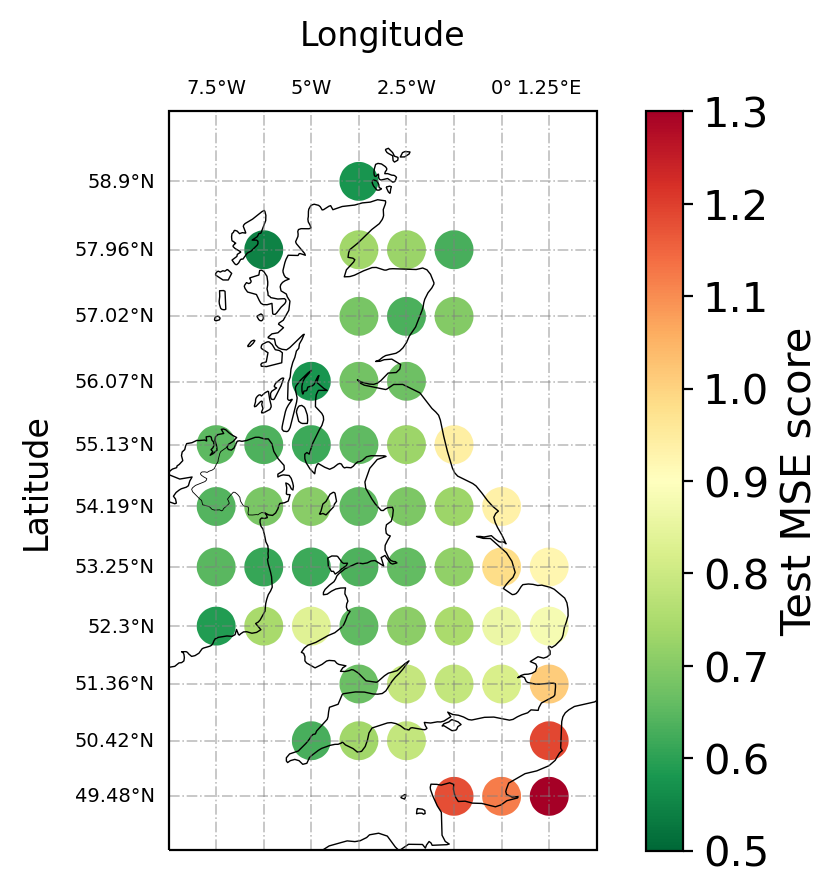

In [51]:
plot_spatial_mse1(baseline_xgboost_location.reset_index())
plt.savefig('Baseline_xgboost spatial analysis map (shared axis to xgboost).png', bbox_inches = 'tight')

# By Year

In [52]:
baseline_catboost_year = analysis_year(baseline_catboost)
lagged_autoreg_catboost_year = analysis_year(lagged_autoreg_catboost)
baseline_xgboost_year = analysis_year(baseline_xgboost)
baseline_lgbm_year = analysis_year(baseline_lgbm)
autoreg_lgbm_year = analysis_year(autoreg_lgbm)

In [53]:
##Concatenate together the tables reporting MSE per ensemble member
by_year_comparison = pd.concat([baseline_catboost_year,lagged_autoreg_catboost_year,baseline_xgboost_year,
                               baseline_lgbm_year,autoreg_lgbm_year],axis=1)
## Renaming column as ensemble member number
by_year_comparison.columns.values[0] = "Baseline CatBoost"
by_year_comparison.columns.values[1] = "1-LAGGED-AUTOREG CatBoost"
by_year_comparison.columns.values[2] = "Baseline XGBoost"
by_year_comparison.columns.values[3] = "Baseline LightGBM"
by_year_comparison.columns.values[4] = "1-AUTOREG LightGBM"

##Save for reporting table
by_year_comparison.to_csv('Yearly emulator performance.csv')

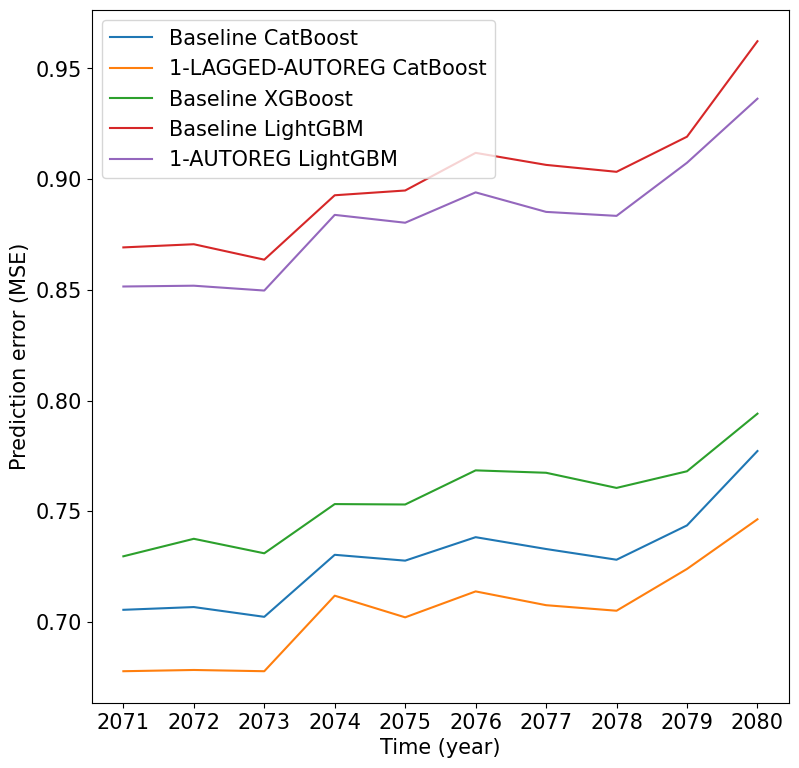

In [54]:
ax = by_year_comparison.plot(figsize=(9,9),lw=1.5)
plt.xticks(np.arange(2071, 2080+1, 1))
ax.set_xlabel("Time (year)")
ax.set_ylabel("Prediction error (MSE)")
plt.savefig('Yearly analysis ts.png', bbox_inches = 'tight')

## Calculating grouped MSE for chosen emulator

In [67]:
lagged_autoreg_catboost

time        lat   lon  Ensemble_num  TREFMXAV_U      y_pred
1233596  2071-01-01  49.476440 -1.25             3   289.56570  287.243447
1233597  2071-01-01  49.476440  0.00             3   289.26990  287.291947
1233598  2071-01-01  49.476440  1.25             3   287.94110  286.855899
1233599  2071-01-01  50.418850 -5.00             3   286.99823  286.055843
1233600  2071-01-01  50.418850 -3.75             3   288.30580  286.400444
...             ...        ...   ...           ...         ...         ...
44126831 2080-12-31  57.958115 -6.25            33   281.49220  281.624718
44126832 2080-12-31  57.958115 -3.75            33   280.94980  280.212697
44126833 2080-12-31  57.958115 -2.50            33   281.72986  281.623464
44126834 2080-12-31  57.958115 -1.25            33   282.41420  281.930803
44126835 2080-12-31  58.900524 -3.75            33   282.37146  282.178540

[5883800 rows x 6 columns]

In [ ]:
def analysis_year(df):
    by_year = df.groupby(pd.DatetimeIndex(df['time']).year).apply(mse_analysis).reset_index()
    by_year = by_year.rename(columns={"time":"Year"})
    by_year = by_year.set_index('Year')

    return by_year

# By Season

In [55]:
baseline_catboost_season = analysis_seasonal(baseline_catboost)
lagged_autoreg_catboost_season = analysis_seasonal(lagged_autoreg_catboost)
baseline_xgboost_season = analysis_seasonal(baseline_xgboost)
baseline_lgbm_season = analysis_seasonal(baseline_lgbm)
autoreg_lgbm_season = analysis_seasonal(autoreg_lgbm)

In [56]:
##Concatenate together the tables reporting MSE per ensemble member
by_season_comparison = pd.concat([baseline_catboost_season,lagged_autoreg_catboost_season,baseline_xgboost_season,
                               baseline_lgbm_season,autoreg_lgbm_season],axis=1)
## Renaming column as ensemble member number
by_season_comparison.columns.values[0] = "Baseline CatBoost"
by_season_comparison.columns.values[1] = "1-LAGGED-AUTOREG CatBoost"
by_season_comparison.columns.values[2] = "Baseline XGBoost"
by_season_comparison.columns.values[3] = "Baseline LightGBM"
by_season_comparison.columns.values[4] = "1-AUTOREG LightGBM"

#display(by_season_comparison)
##Save for reporting table
by_season_comparison.to_csv('Seasonal emulator performance.csv')

In [57]:
by_season_comparison_transpose = by_season_comparison.transpose()
display(by_season_comparison_transpose)

Season                          DJF       MAM       JJA       SON
Baseline CatBoost          0.686341  0.801250  0.828483  0.598557
1-LAGGED-AUTOREG CatBoost  0.664056  0.795066  0.799457  0.556630
Baseline XGBoost           0.704376  0.855522  0.881656  0.580542
Baseline LightGBM          0.764649  0.955088  1.087260  0.786477
1-AUTOREG LightGBM         0.741348  1.025903  1.040287  0.717043

In [58]:
by_season_comparison_transpose_dict = {
    'Baseline CatBoost': (0.6863,0.8013,0.8285,0.5986),
    '1-LAGGED-AUTOREG CatBoost': (0.6641,0.7951,0.7995,0.5566),
    'Baseline XGBoost': (0.7044,0.8555,0.8817,0.5805),
    'Baseline LightGBM': (0.7646,0.9551,1.0873,0.7865),
    '1-AUTOREG LightGBM':(0.7413,1.0259,1.0403,0.7170)
}

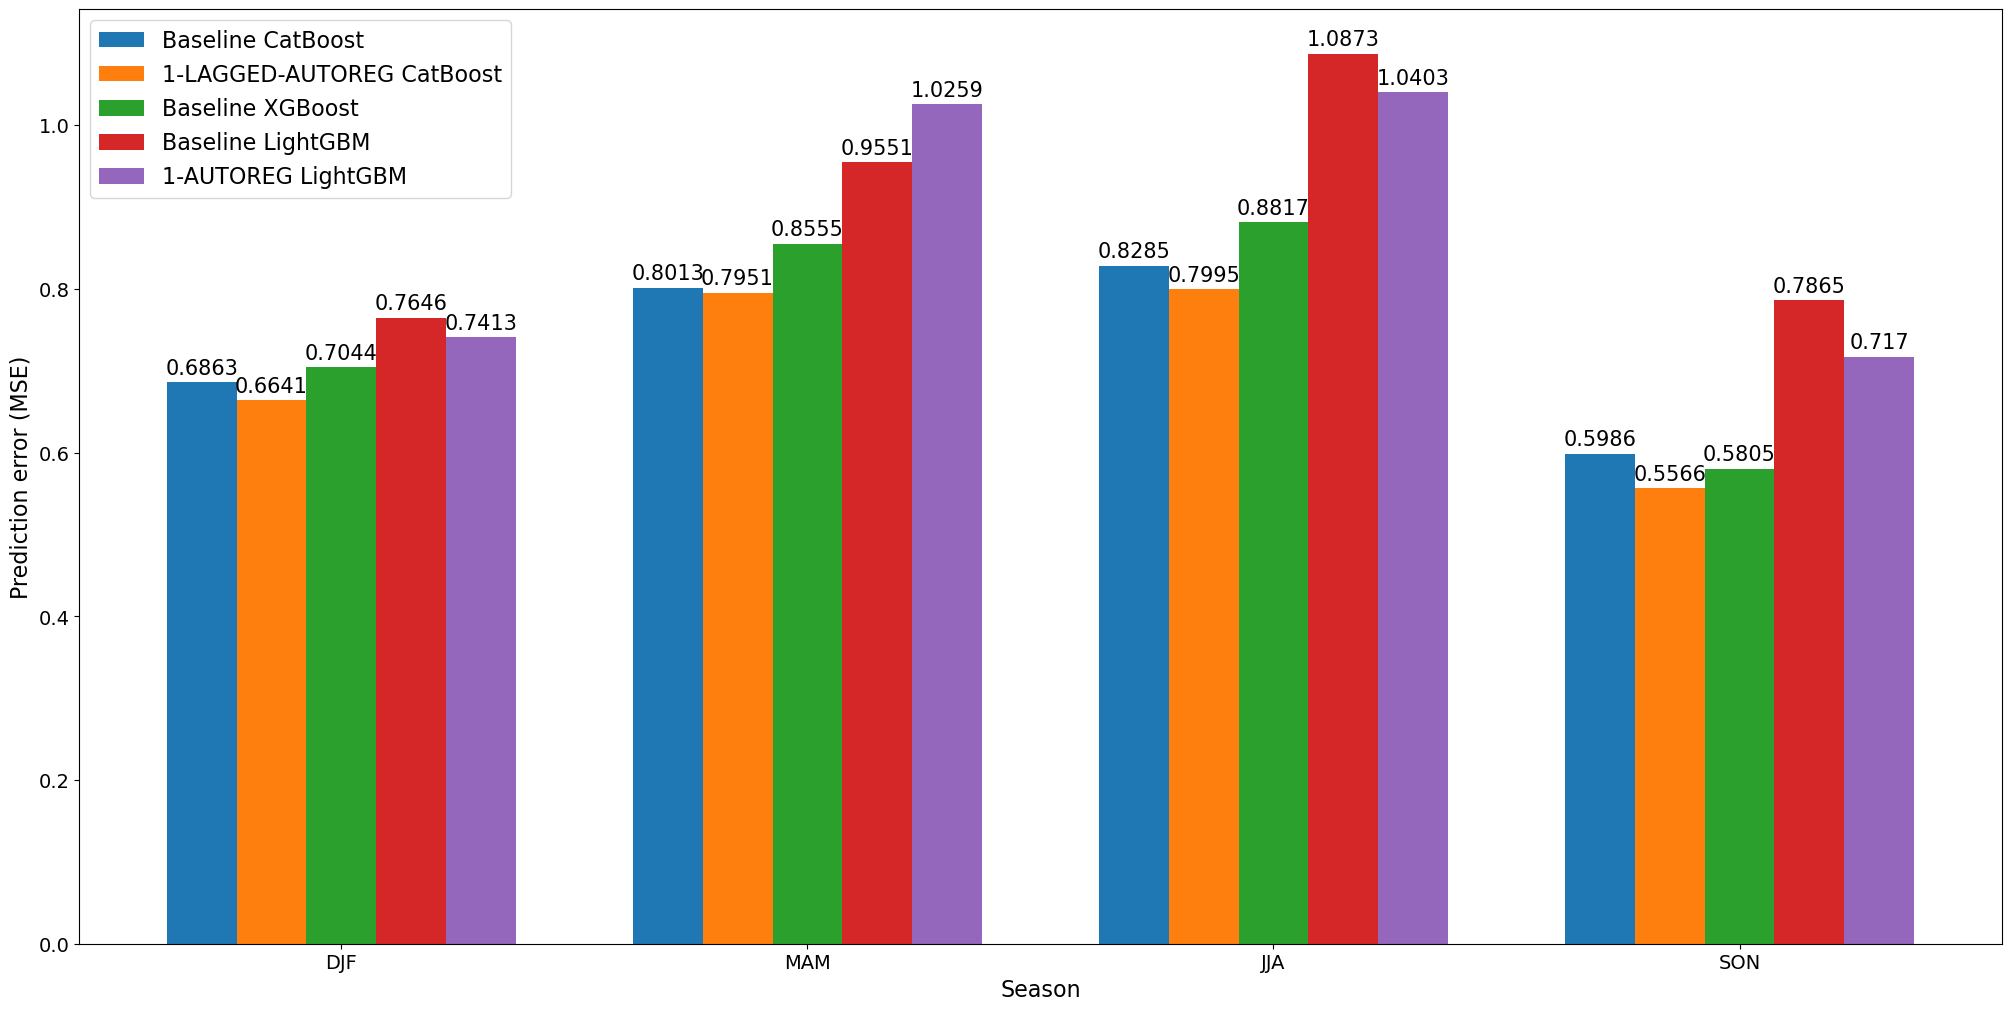

In [62]:
seasons = ("DJF","MAM","JJA","SON")
x = np.arange(len(seasons)) # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(20,10))

for model, measurement in by_season_comparison_transpose_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=model)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prediction error (MSE)', fontsize=16)
ax.set_xlabel('Season', fontsize=16)
#ax.set_title('')
ax.set_xticks(x + (width*2), seasons)
ax.legend(loc='upper left', ncols=1, fontsize=16)
#ax.set_ylim(0, 1)    
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('Seasonal analysis grouped bar chart.png', bbox_inches = 'tight')
plt.show()

# Visualising constant improvements within Linear Regression

In [60]:
linear_results = pd.read_csv('Final Linear Regression results.csv', header=0)
##Set index
linear_results = linear_results.set_index('Lag days')

display(linear_results)

LAGGED-PART  LAGGED-FULL   AUTOREG  LAGGED-AUTOREG
Lag days                                                    
1            2.023281     1.992453  1.683184        1.039643
2            2.020087     1.953517  1.682629        0.975923
3            2.018290     1.926042  1.680045        0.942650
4            2.017025     1.899813  1.679762        0.923597
5            2.016124     1.876274  1.679621        0.910656

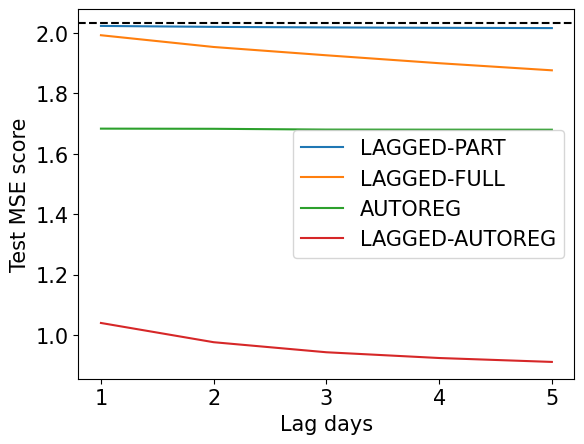

In [61]:
ax = linear_results.plot()
## Adding black dashed line at Baseline model MSE test score
plt.axhline(y = 2.03220987, color = 'black', linestyle = '--')
plt.xticks(np.arange(1, 5+1, 1))
ax.set_ylabel("Test MSE score")
plt.savefig('Linear Regression results MSE test scores.png', bbox_inches = 'tight')
plt.show()

Across all experiments, all Linear Regression test MSE scores reduce with each new lag day added as it is able to parameterise the linear relationship between this lagged variable and the label variable to whatever degree.

Notably, the improvements made with supplementing the dataset with Autoregressive feature is much better than with partial or full set of lagged covariates.

Ultimately, the Linear Regression model performs best with LAGGED-AUTOREG dataset, with 5-LAGGED-AUTOREG achieving test MSE score of 0.9107 (4 d.p.).